## Telecom Churn Prediction

### Kaggle competition
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

### Objective
 - Build predictive models to identify customers at high risk of churn
 - Identify important variables that are strong predictors of churn
 - Improve the performance of the model, using various algorithm, dimensionality reduction techniques etc

<b>Step 1:</b> <b>Data Understanding -</b> Impute missing value, features of no contibution, null value treatment, Identifying the wrong values in dataset, dervied values, format standardisation
<br><b>Step 2:</b> <b>Data Visualisation -</b> multicollinearity analysis, scatter plot, box plot for outlier removal, heat map etc, Univariate and Bivariate analysis (Visualisation).
<br><b>Step 3:</b> <b>Data Preperation -</b> Class imbalance, create dummy variables and standardise the numerical values, train test split
<br><b>Step 4:</b> <b>Basic Model Building -</b> Build Logistic Regression, Decision Tree classifier, random forest Classifier with hyperparameter tuning using Grid search CV to identify the important features and best model.
<br><b>Step 5:</b> <b> LR using RFE -</b> Build a logistic regression model with RFE and check for pvalue and VIF, Evaluation metrics - AUC ROC, accuracy, f1score, recall etc
<br><b>Step 6:</b> <b> Dimensionality Reduction -</b>Build a logistic regression model with PCA
<br><b>Step 7: </b> <b>Kaggle prediction</b> Predictions on unseen test data (kaggle - test.csv)

### Step 1: Data Understanding
##### Impute missing value, features of no contibution, null value treatment, Identifying the wrong values in dataset, dervied values, format standardisation

In [1]:
# Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Preprocessing Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Stats model
import statsmodels.api as sts
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing Logistic Regression and Gridserach CV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Importing Decision Tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# For Decision Tree Visualisation
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Importing Random forest classifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.decomposition import PCA
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA
# Importing libraries for cross validation
from sklearn.model_selection import KFold

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("train data : ",len(train_df), "\ntest data :", len(test_df))

train data :  69999 
test data : 30000


In [5]:
train_df.describe(include='all', percentiles=[0.25, 0.50, 0.60,0.75, 0.85, 0.90, 0.95,0.99])

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
60%     41998.800000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
85%     59498.300000      109.0             0.0             0.0   
90%     62998.200000      109.0             0.0             0.0   
95%     66498.100000      109.0             0.0             0.0   
99%     69298.020000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
60%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
85%                0.0                  NaN                  NaN   
90%                0.0                  NaN                  NaN   
95%                0.0                  NaN                  NaN   
99%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7  ...   sachet_3g_7  \
count                 69266  69999.000000  69999.000000  ...  69999.000000   
unique                    1           NaN           NaN  ...           NaN   
top               8/31/2014           NaN           NaN  ...           NaN   
freq                  69266           NaN           NaN  ...           NaN   
mean                    NaN    283.134365    278.185912  ...      0.081444   
std                     NaN    334.213918    344.366927  ...      0.634547   
min                     NaN  -2258.709000  -1289.715000  ...      0.000000   
25%                     NaN     93.581000     86.714000  ...      0.000000   
50%                     NaN    197.484000    191.588000  ...      0.000000   
60%                     NaN    252.416800    246.981000  ...      0.000000   
75%                     NaN    370.791000    365.369500  ...      0.000000   
85%                     NaN    507.979600    500.953100  ...      0.000000   
90%                     NaN    619.993800    615.661400  ...      0.000000   
95%                     NaN    832.022700    823.236700  ...      0.000000   
99%                     NaN   1400.276640   1414.891380  ...      2.000000   
max                     NaN  27731.088000  35145.834000  ...     33.000000   

         sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon  \
count   69999.000000  17568.000000  17865.000000  18417.000000  69999.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           N

In [6]:
test_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
for col in test_df.columns:
    print("Column name: {}, Null values %: {}".format(col,round(100*(train_df[col].isnull().sum()/len(train_df.index)), 2)))

Column name: id, Null values %: 0.0
Column name: circle_id, Null values %: 0.0
Column name: loc_og_t2o_mou, Null values %: 1.0
Column name: std_og_t2o_mou, Null values %: 1.0
Column name: loc_ic_t2o_mou, Null values %: 1.0
Column name: last_date_of_month_6, Null values %: 0.0
Column name: last_date_of_month_7, Null values %: 0.57
Column name: last_date_of_month_8, Null values %: 1.05
Column name: arpu_6, Null values %: 0.0
Column name: arpu_7, Null values %: 0.0
Column name: arpu_8, Null values %: 0.0
Column name: onnet_mou_6, Null values %: 3.95
Column name: onnet_mou_7, Null values %: 3.84
Column name: onnet_mou_8, Null values %: 5.29
Column name: offnet_mou_6, Null values %: 3.95
Column name: offnet_mou_7, Null values %: 3.84
Column name: offnet_mou_8, Null values %: 5.29
Column name: roam_ic_mou_6, Null values %: 3.95
Column name: roam_ic_mou_7, Null values %: 3.84
Column name: roam_ic_mou_8, Null values %: 5.29
Column name: roam_og_mou_6, Null values %: 3.95
Column name: roam_og_m

In [8]:
missing_data = pd.DataFrame(round(100*(train_df.isnull().sum()/train_df.shape[0]), 2)).reset_index()
missing_data

index    0
0                   id  0.0
1            circle_id  0.0
2       loc_og_t2o_mou  1.0
3       std_og_t2o_mou  1.0
4       loc_ic_t2o_mou  1.0
..                 ...  ...
167                aon  0.0
168         aug_vbc_3g  0.0
169         jul_vbc_3g  0.0
170         jun_vbc_3g  0.0
171  churn_probability  0.0

[172 rows x 2 columns]

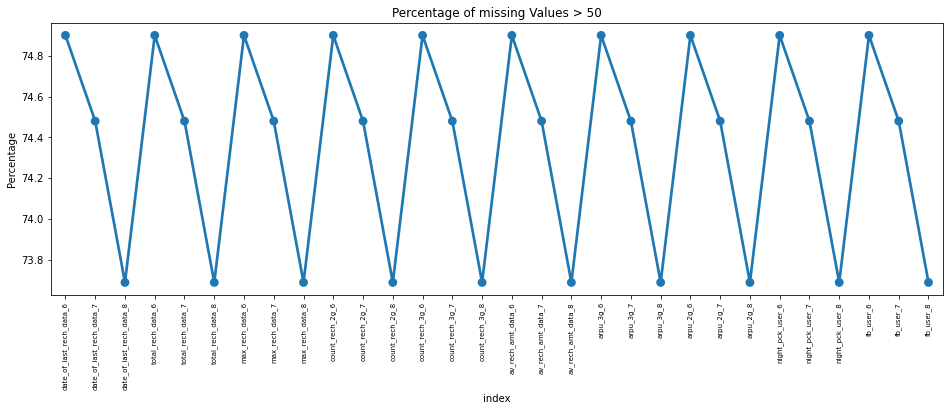

In [9]:
plt.figure(figsize=(16,5))
ax = sns.pointplot('index', 0, data=missing_data[missing_data[0]>50])
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of missing Values > 50")
plt.ylabel("Percentage")
plt.show()

###### We are able to see a pattern in missing values of several features, its consistent. We have above features with very high missing values , so dropping them

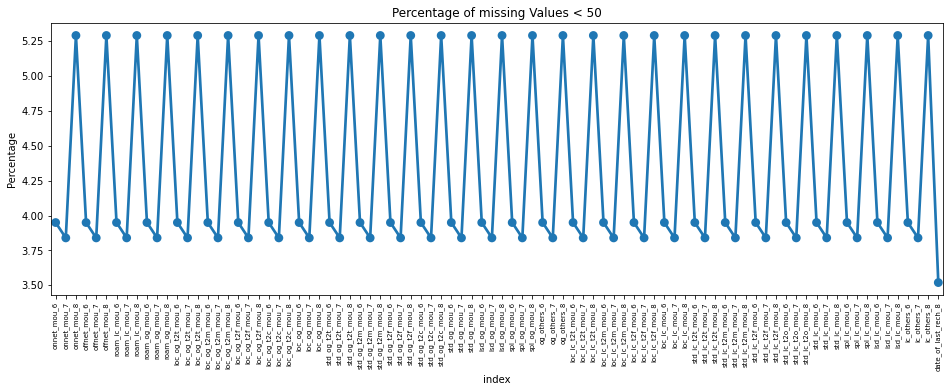

In [10]:
plt.figure(figsize=(16,5))
missing_50 = missing_data[missing_data[0]<50]
ax = sns.pointplot('index', 0, data=missing_50[missing_50[0]>2])
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of missing Values < 50")
plt.ylabel("Percentage")
plt.show()

In [11]:
date_field = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
              'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' ,
              'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']


###### I have analysed and found that these date fields are not useful, they even have missing values, so dropping them

In [12]:
no_use_value = []
for i in train_df.columns:
    if (train_df[i].nunique() == 1):
        no_use_value.append(i)
        print(i, train_df[i].nunique())
    elif (train_df[i].nunique() == len(train_df)):
        no_use_value.append(i)
        print(i, train_df[i].nunique())

id 69999
circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
std_og_t2c_mou_6 1
std_og_t2c_mou_7 1
std_og_t2c_mou_8 1
std_ic_t2o_mou_6 1
std_ic_t2o_mou_7 1
std_ic_t2o_mou_8 1


In [13]:
missing_grt_70 = list(missing_data[missing_data[0]>70]['index'])
missing_grt_70

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [14]:
column_to_remove = date_field+no_use_value+missing_grt_70
column_to_remove = list(set(column_to_remove))
column_to_remove

['max_rech_data_7',
 'av_rech_amt_data_8',
 'fb_user_7',
 'fb_user_6',
 'count_rech_3g_6',
 'loc_og_t2o_mou',
 'total_rech_data_8',
 'av_rech_amt_data_6',
 'count_rech_3g_7',
 'fb_user_8',
 'date_of_last_rech_6',
 'last_date_of_month_6',
 'id',
 'date_of_last_rech_8',
 'date_of_last_rech_data_8',
 'arpu_3g_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_7',
 'circle_id',
 'count_rech_2g_8',
 'max_rech_data_8',
 'night_pck_user_6',
 'total_rech_data_7',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'max_rech_data_6',
 'std_ic_t2o_mou_6',
 'total_rech_data_6',
 'arpu_2g_7',
 'std_og_t2c_mou_8',
 'arpu_2g_6',
 'count_rech_2g_7',
 'night_pck_user_8',
 'loc_ic_t2o_mou',
 'arpu_2g_8',
 'night_pck_user_7',
 'std_ic_t2o_mou_7',
 'arpu_3g_8',
 'last_date_of_month_8',
 'last_date_of_month_7',
 'av_rech_amt_data_7',
 'count_rech_2g_6',
 'arpu_3g_7',
 'count_rech_3g_8',
 'std_og_t2o_mou',
 'std_ic_t2o_mou_8',
 'date_of_last_rech_data_6']

In [15]:
train_df.drop(columns=column_to_remove,axis=1,inplace=True)
train_df

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       31.277   87.009    7.527        48.58       124.38         1.29   
1        0.000  122.787   42.953         0.00         0.00         0.00   
2       60.806  103.176    0.000         0.53        15.93         0.00   
3      156.362  205.260  111.095         7.26        16.01         0.00   
4      240.708  128.191  101.565        21.28         4.83         6.13   
...        ...      ...      ...          ...          ...          ...   
69994   15.760  410.924  329.136         0.00         7.36        10.93   
69995  160.083  289.129  265.772       116.54       196.46       232.63   
69996  372.088  258.374  279.782        77.13        68.44        78.44   
69997  238.575  245.414  145.062        14.01         7.64         6.71   
69998  168.269   42.815  167.961         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
0             32.24         96.68          2.33           0.00  ...   
1              0.00         25.99         30.89           0.00  ...   
2             53.99         82.05          0.00           0.00  ...   
3             68.76         78.48         50.23           0.00  ...   
4             56.99         38.11          9.63          53.64  ...   
...             ...           ...           ...            ...  ...   
69994          0.00        488.46        381.64          14.96  ...   
69995         49.53         96.28         48.06           0.00  ...   
69996        335.54        227.94        263.84           0.00  ...   
69997         30.34         16.68         12.56          25.06  ...   
69998          0.00          0.00          0.00           0.00  ...   

       monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
0                 0             0            0            0            0   
1                 1             0            0            0            0   
2                 0             0            0            0            0   
3                 0             0            0            0            0   
4                 0             0            0            1            0   
...             ...           ...          ...          ...          ...   
69994             0             0            0            1            0   
69995             0             0            0            0            0   
69996             0             0            0            0            0   
69997             1             1            0            0            0   
69998             0             0            0            0            0   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0      1958        0.00        0.00        0.00                  0  
1       710        0.00        0.00        0.00                  0  
2       882        0.00        0.00        0.00                  0  
3       982        0.00        0.00        0.00                  0  
4       647        0.00        0.00        0.00                  0  
...     ...         ...         ...         ...                ...  
69994   221        0.00        0.00        0.00                  0  
69995   712        0.00        0.00        0.00                  0  
69996   879        0.00        0.00        0.00                  0  
69997   277      664.25     1402.96      990.97                  0  
69998  1876        0.00        0.00        0.00                  0  

[69999 rows x 125 columns]

###### counting the uniques values 

In [16]:
unique_values = [{'column_name':row, 'unique_length':len(train_df[row].unique()), 'unique_values':train_df[row].unique()} for row in train_df.columns.to_list()]
unique_values_sorted = pd.DataFrame(unique_values).sort_values("unique_length")
unique_values_sorted

column_name  unique_length  \
124  churn_probability              2   
108       monthly_2g_6              5   
109       monthly_2g_7              6   
110       monthly_2g_8              6   
114       monthly_3g_6             10   
..                 ...            ...   
51      total_og_mou_6          33135   
52      total_og_mou_7          33195   
2               arpu_8          60194   
1               arpu_7          61425   
0               arpu_6          61615   

                                         unique_values  
124                                             [0, 1]  
108                                    [0, 1, 2, 3, 4]  
109                                 [0, 1, 2, 4, 3, 5]  
110                                 [0, 1, 2, 4, 3, 5]  
114                     [0, 1, 2, 4, 3, 5, 6, 8, 7, 9]  
..                                                 ...  
51   [81.21, 0.0, 56.49, 76.03, 63.26, 18.54, 70.44...  
52   [221.68, 30.73, 99.36, 95.98, 42.94, 41.76, 94...  
2    [7.527, 42.953, 0.0, 111.095, 101.565, 88.462,...  
1    [87.009, 122.787, 103.176, 205.26, 128.191, 83...  
0    [31.277, 0.0, 60.806, 156.362, 240.708, 86.193...  

[125 rows x 3 columns]

In [17]:
missing_data = pd.DataFrame(round(100*(train_df.isnull().sum()/train_df.shape[0]), 2)).reset_index()
missing_data

index     0
0               arpu_6  0.00
1               arpu_7  0.00
2               arpu_8  0.00
3          onnet_mou_6  3.95
4          onnet_mou_7  3.84
..                 ...   ...
120                aon  0.00
121         aug_vbc_3g  0.00
122         jul_vbc_3g  0.00
123         jun_vbc_3g  0.00
124  churn_probability  0.00

[125 rows x 2 columns]

In [18]:
list(missing_data[missing_data[0]==3.95]['index'])

['onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6']

###### aggregating missing values and plotting them to see the frequency of values, so that we can impute them with right values

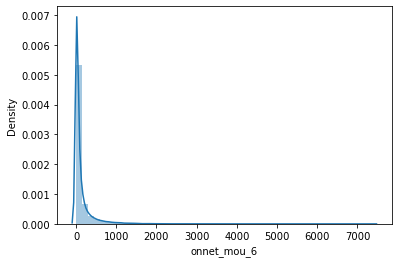

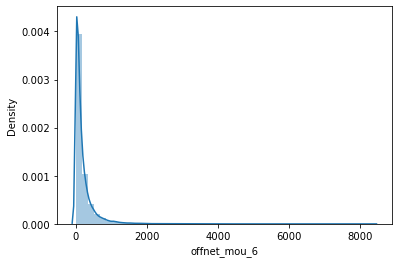

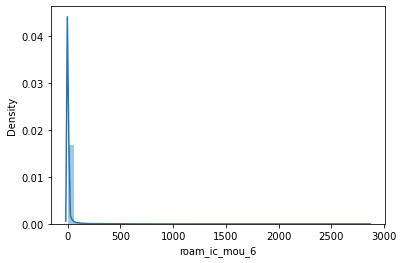

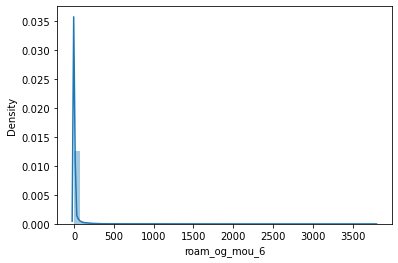

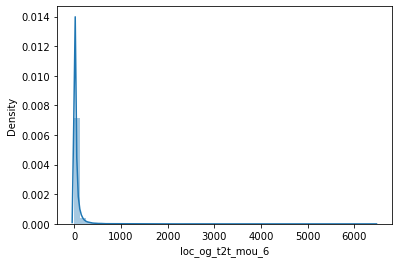

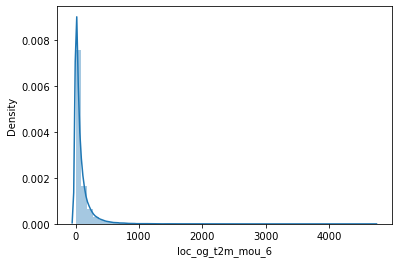

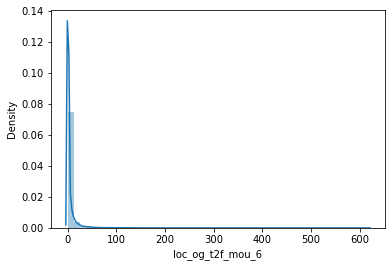

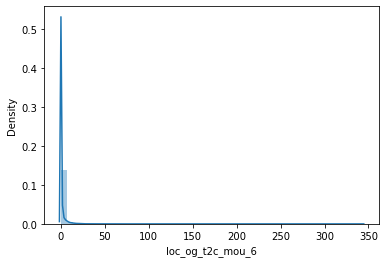

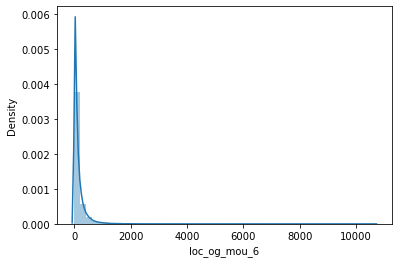

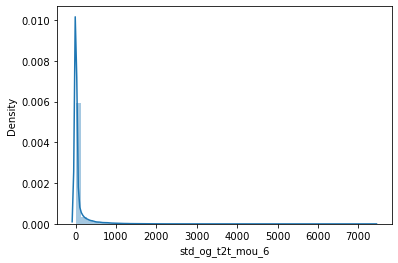

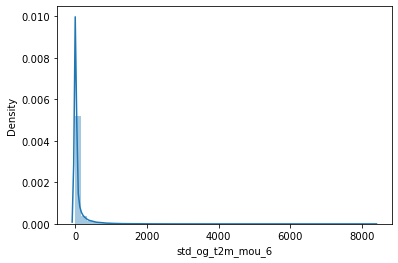

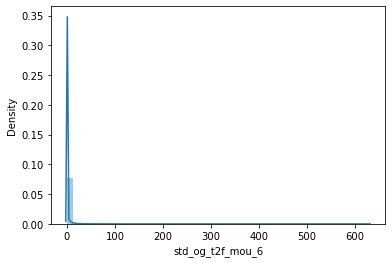

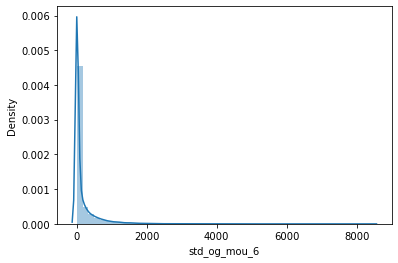

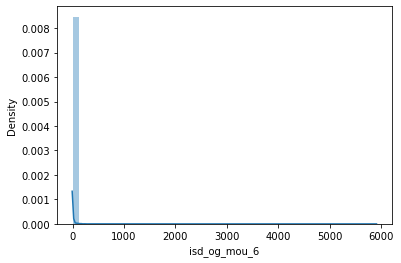

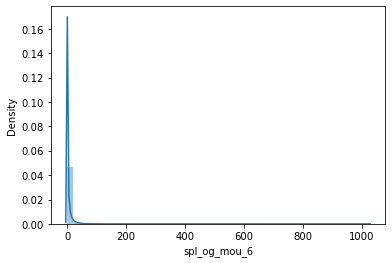

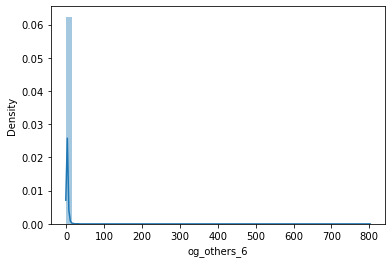

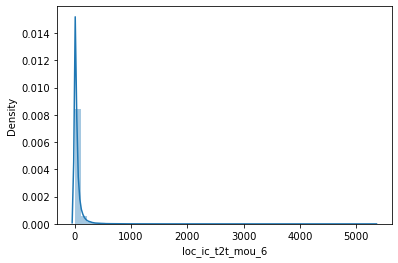

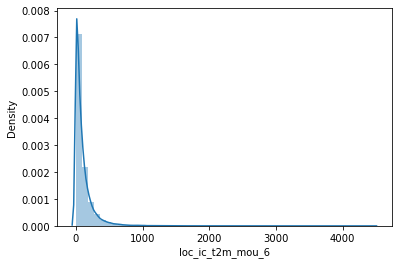

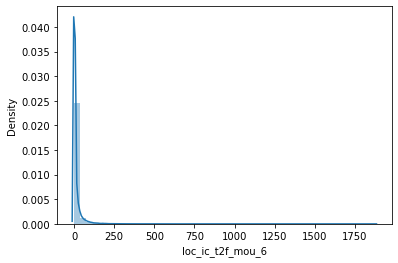

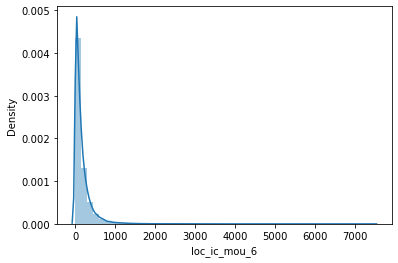

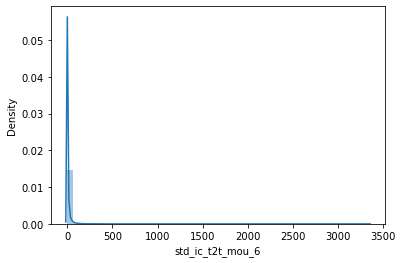

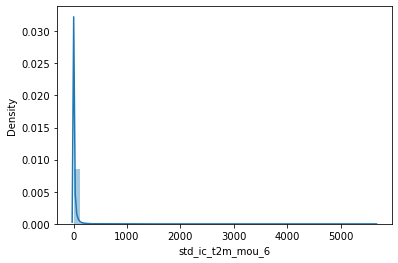

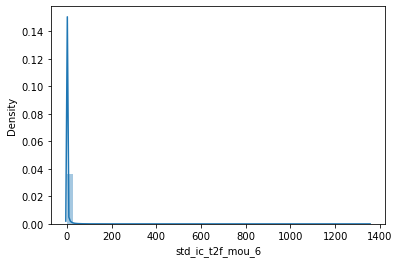

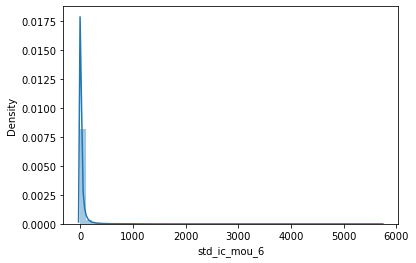

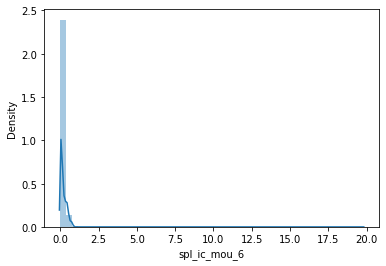

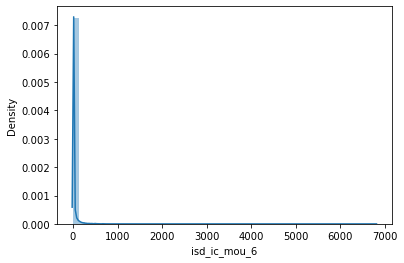

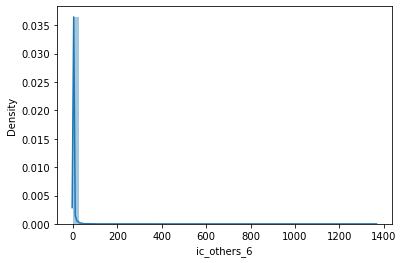

In [19]:
for i in list(missing_data[missing_data[0]==3.95]['index']):
    try:
        sns.distplot(train_df[i])
        plt.show()
    except:
        pass

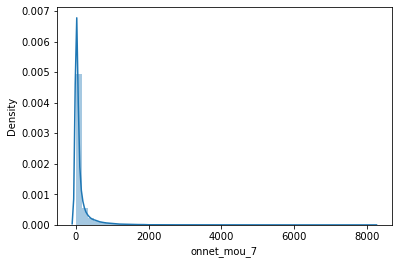

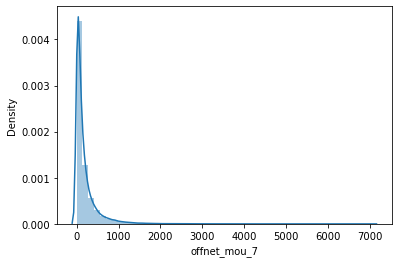

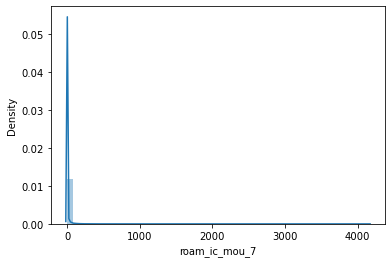

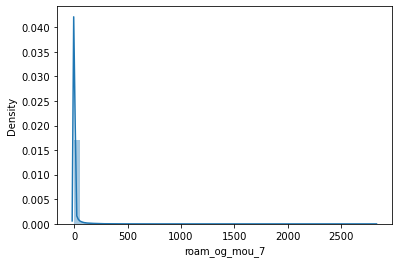

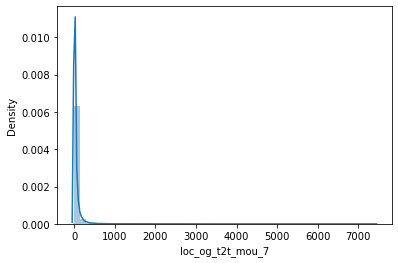

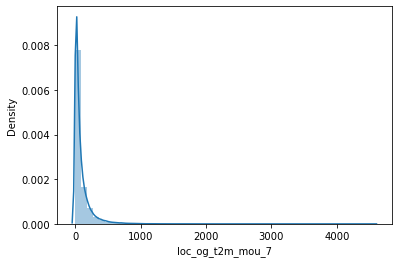

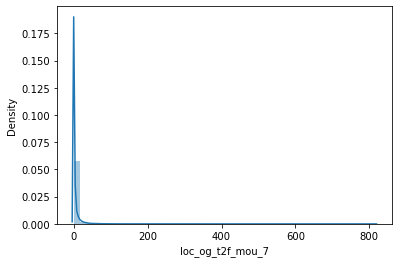

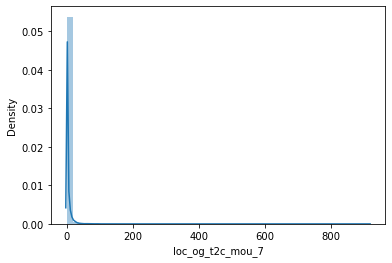

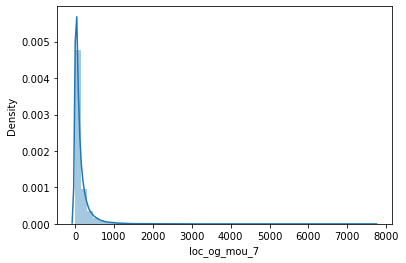

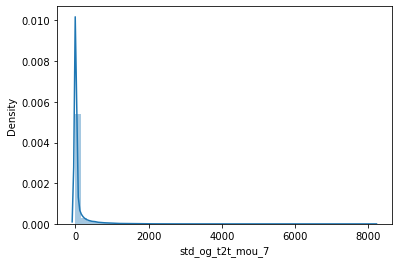

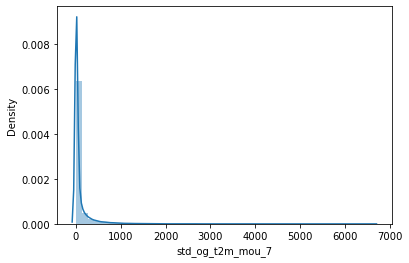

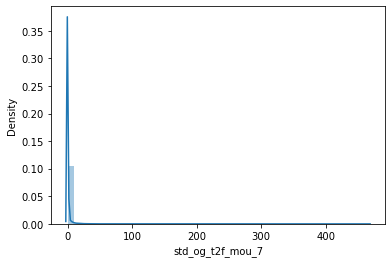

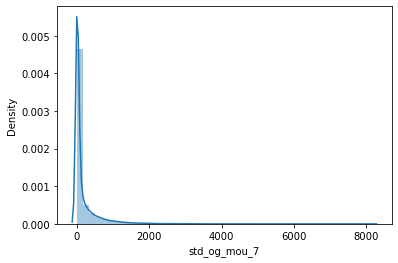

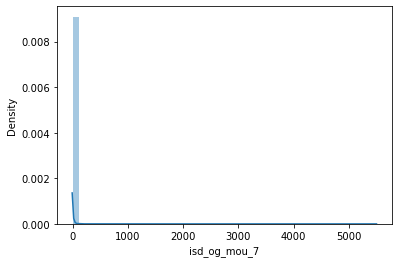

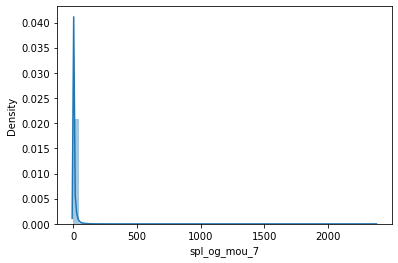

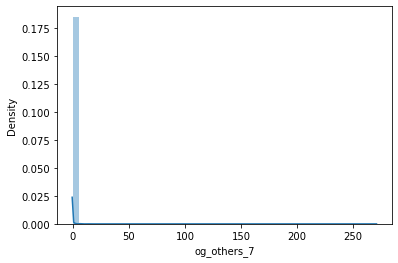

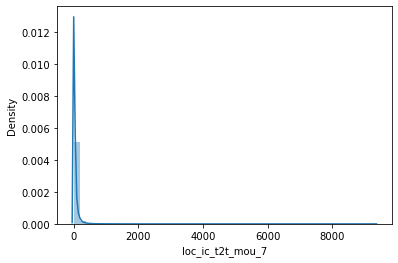

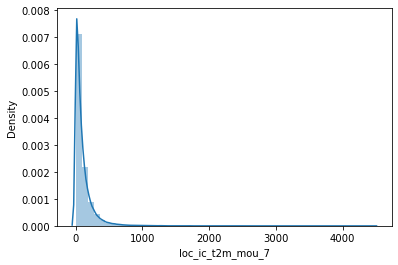

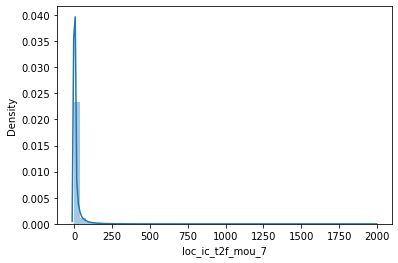

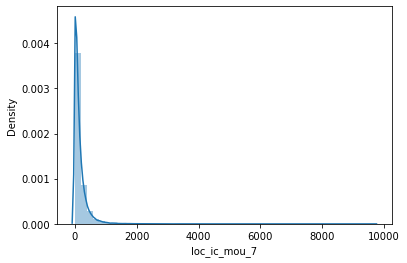

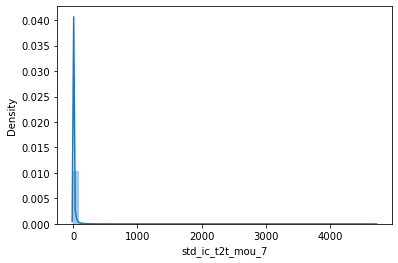

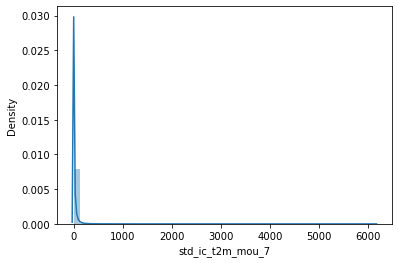

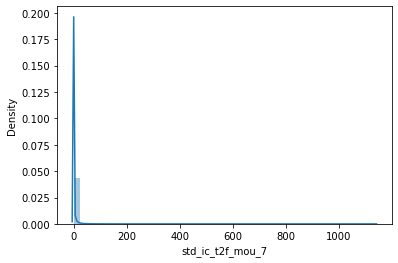

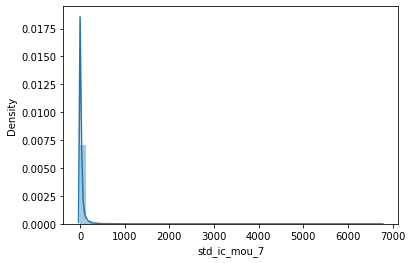

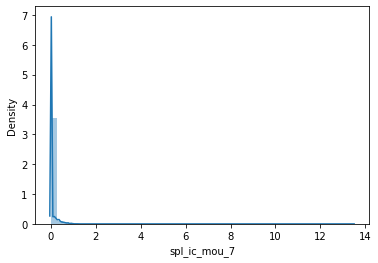

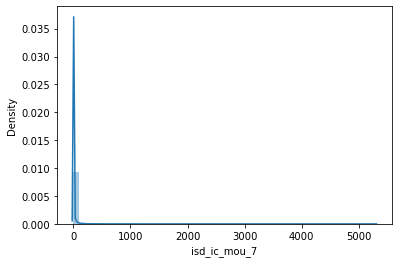

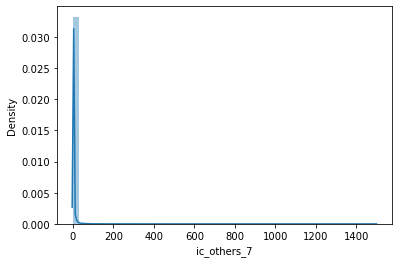

In [20]:
for i in list(missing_data[missing_data[0]==3.84]['index']):
    try:
        sns.distplot(train_df[i])
        plt.show()
    except:
        pass

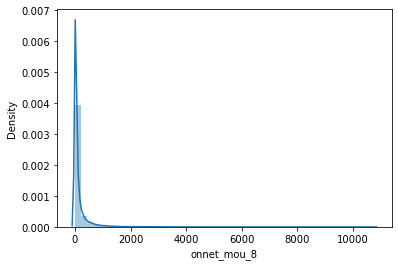

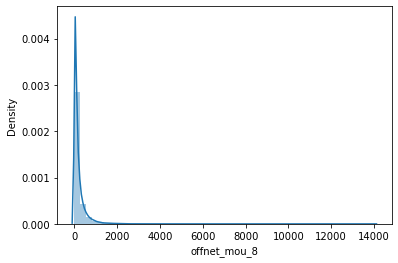

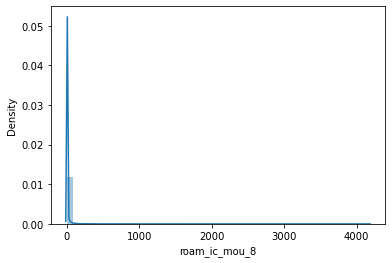

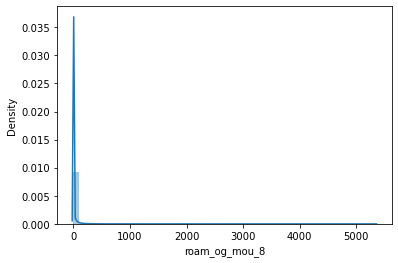

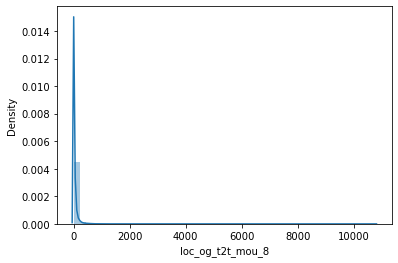

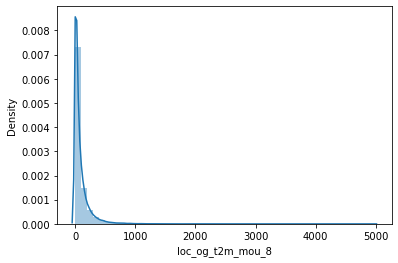

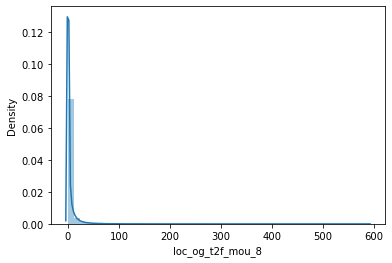

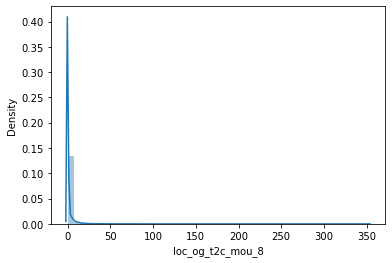

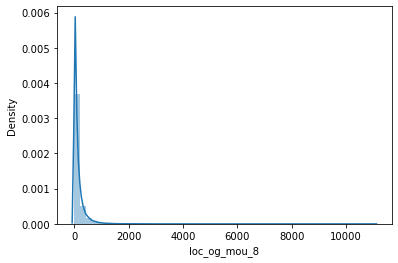

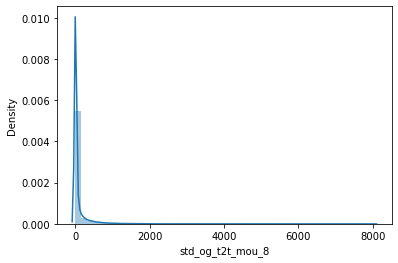

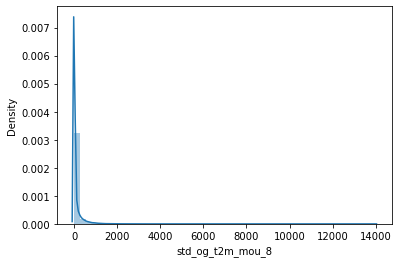

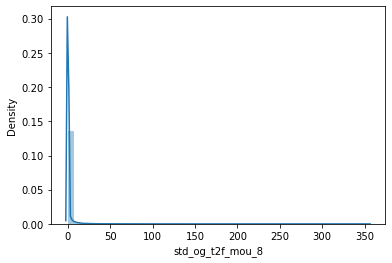

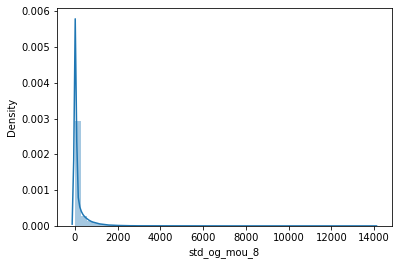

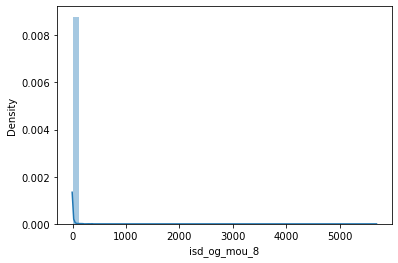

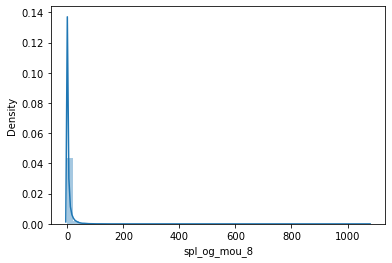

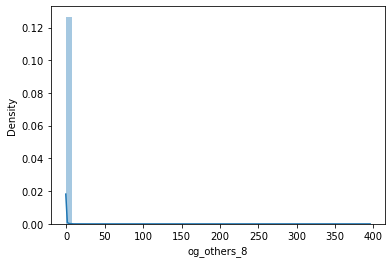

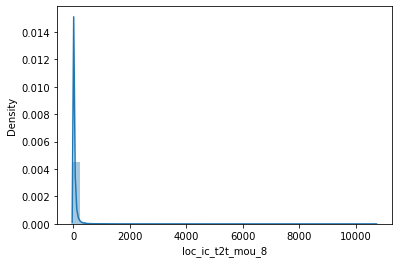

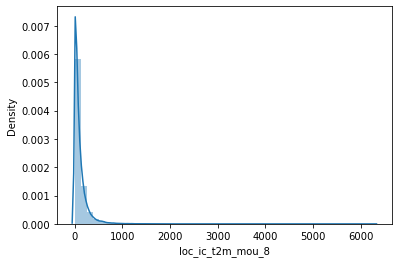

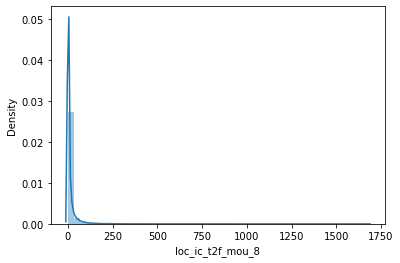

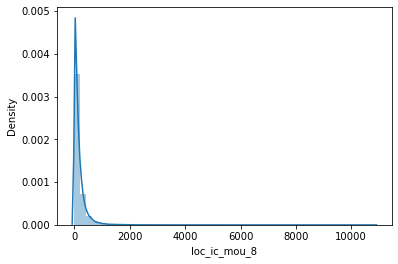

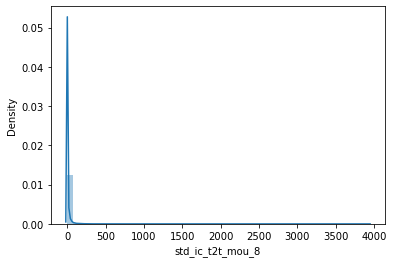

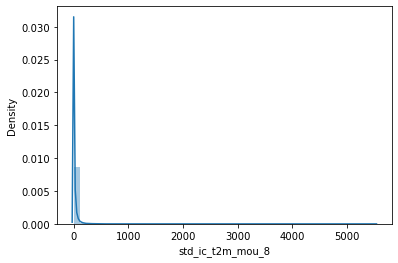

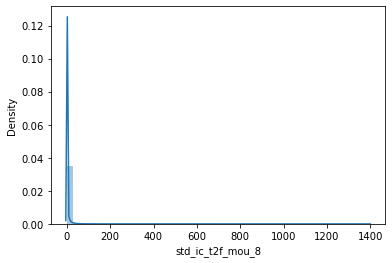

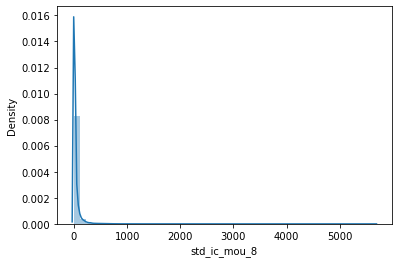

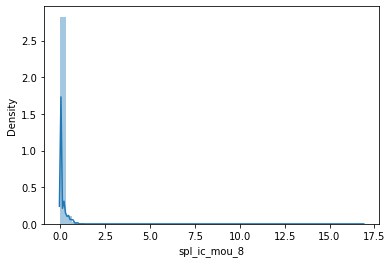

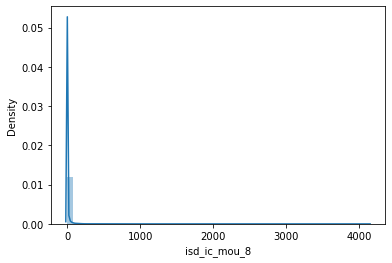

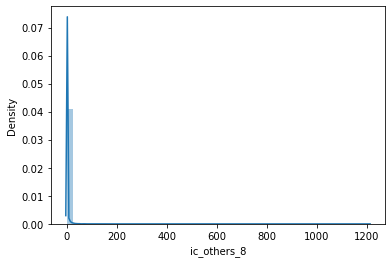

In [21]:
for i in list(missing_data[missing_data[0]==5.29]['index']):
    try:
        sns.distplot(train_df[i])
        plt.show()
    except:
        pass

In [22]:
for i in list(missing_data[missing_data[0]>0]['index']):
    train_df[i] = train_df[i].fillna(0)

In [23]:
#train_df[(train_df.isnull().sum() >0)]
train_df.isnull().sum()[train_df.isnull().sum() >0]

Series([], dtype: int64)

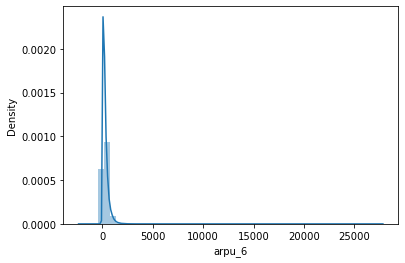

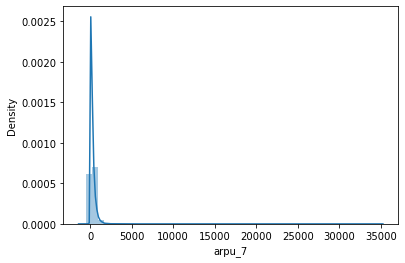

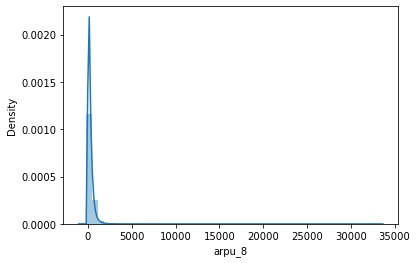

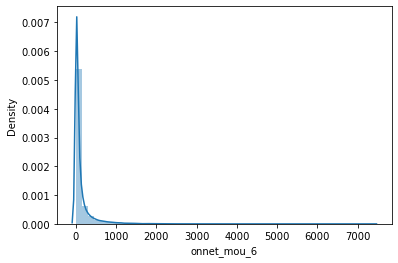

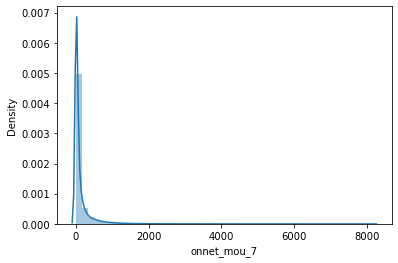

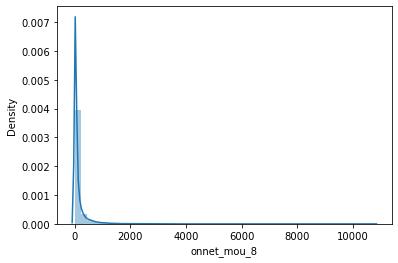

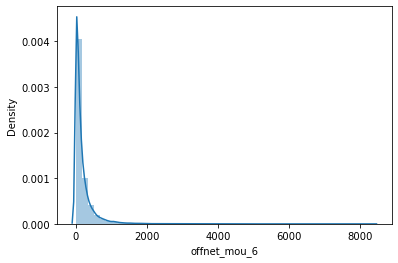

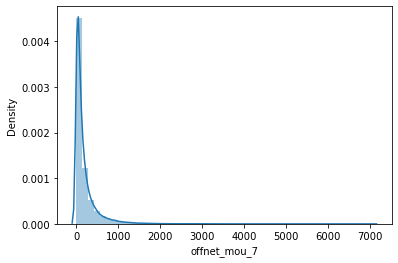

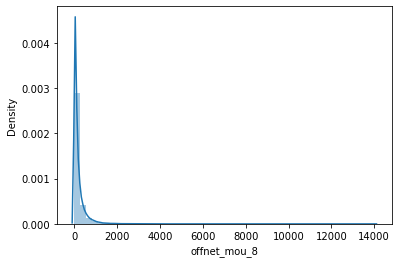

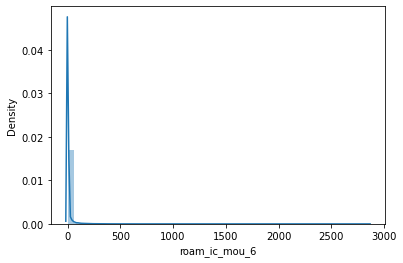

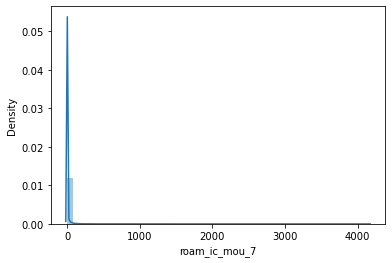

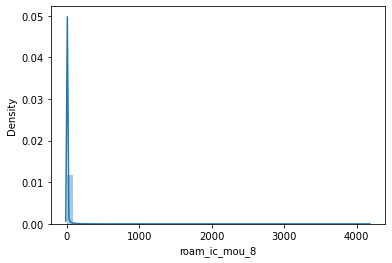

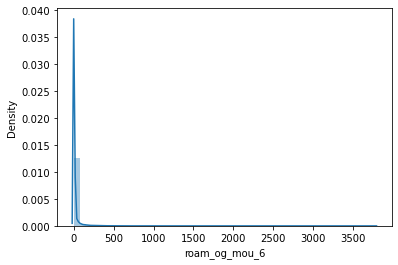

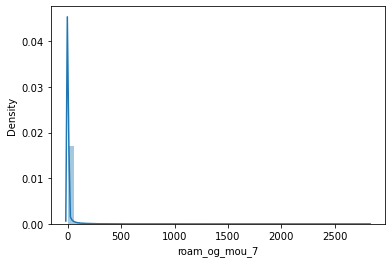

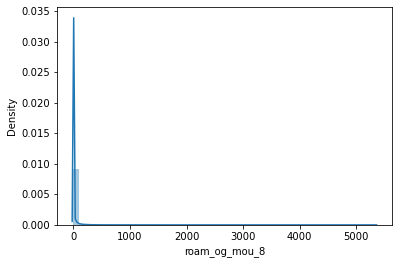

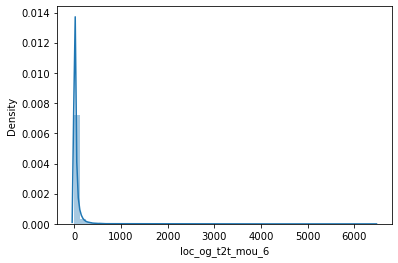

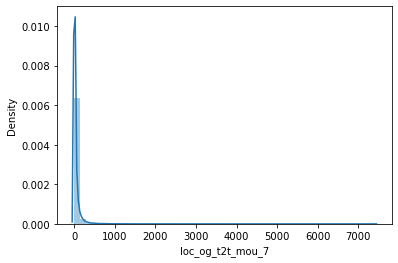

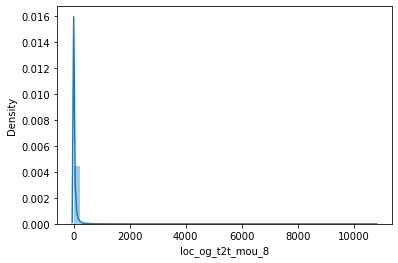

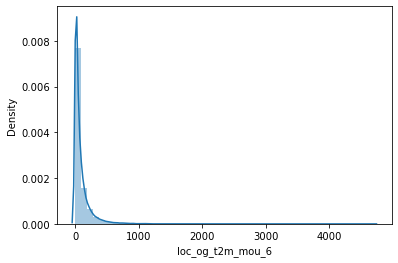

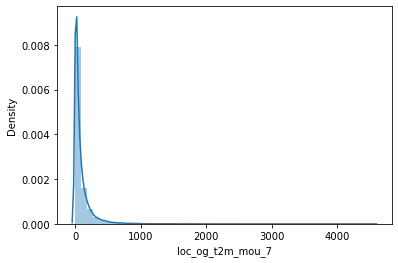

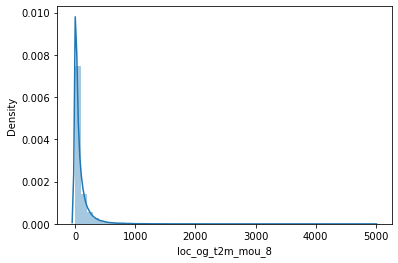

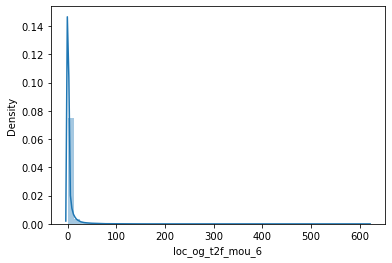

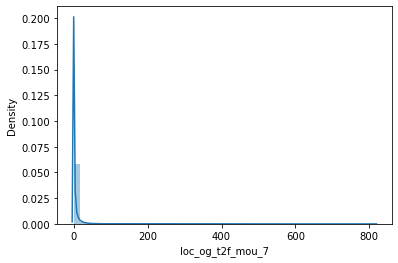

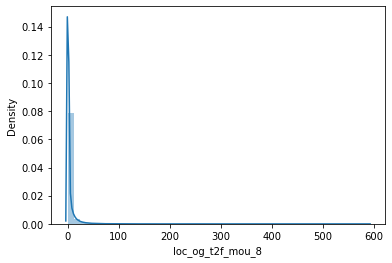

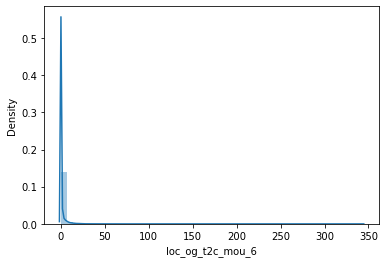

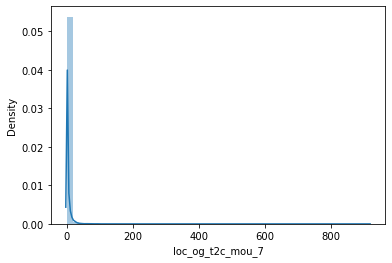

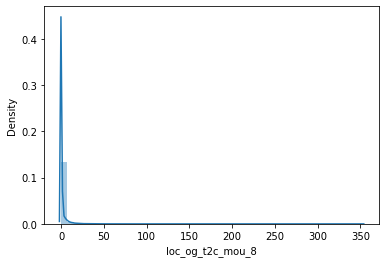

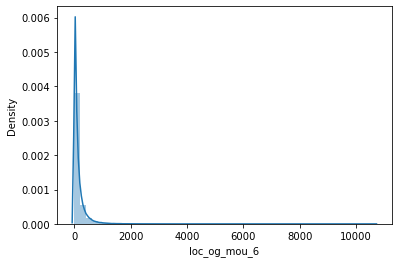

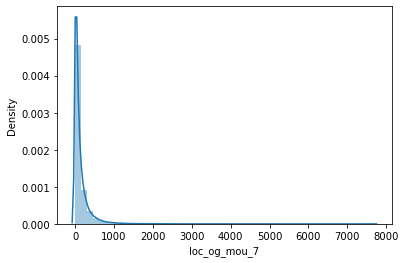

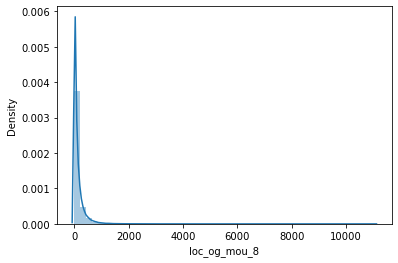

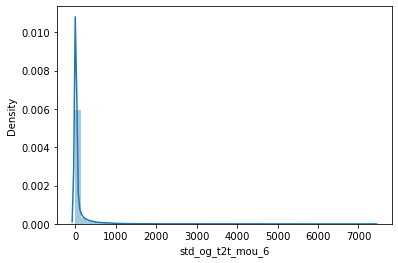

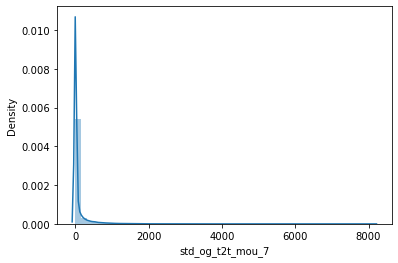

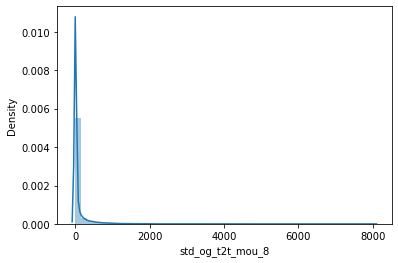

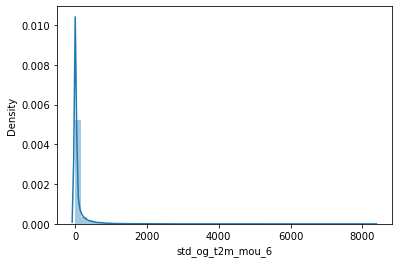

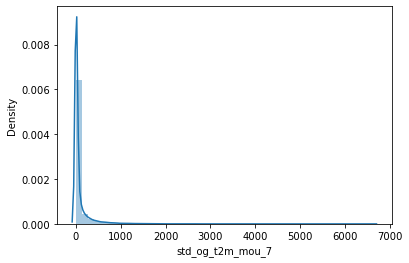

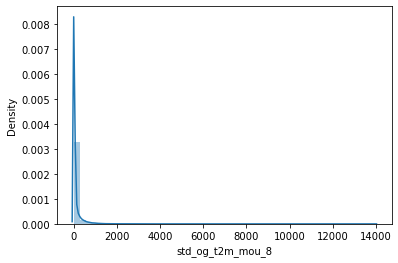

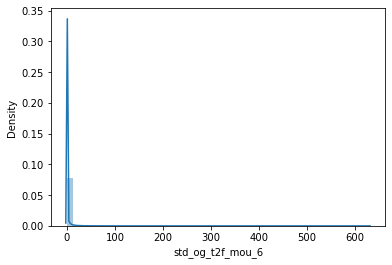

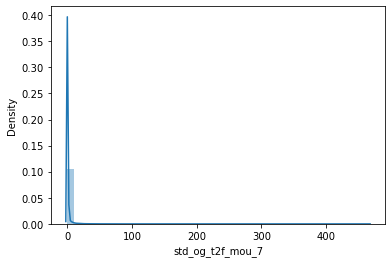

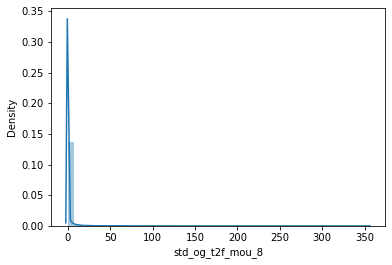

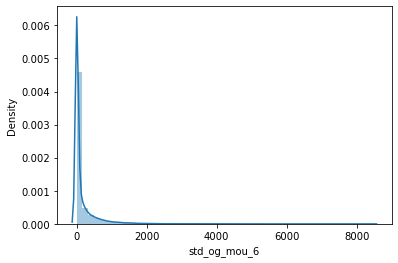

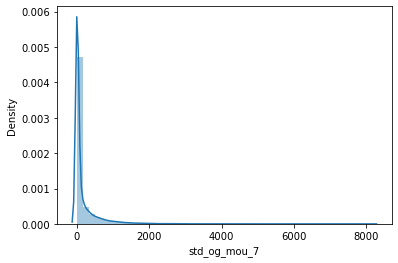

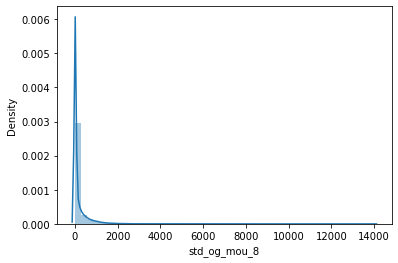

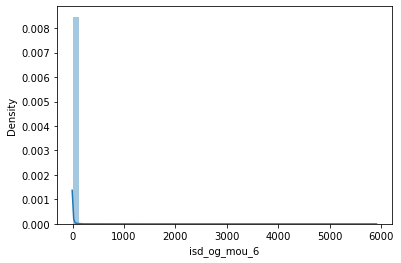

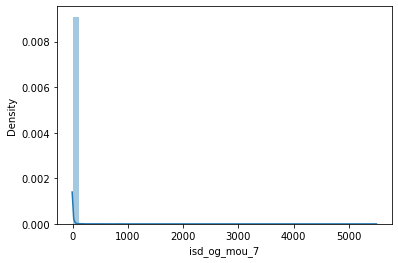

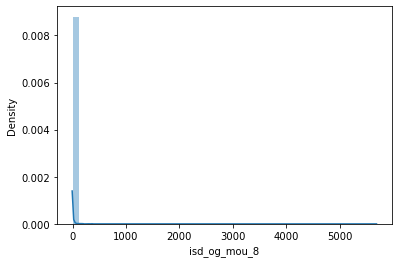

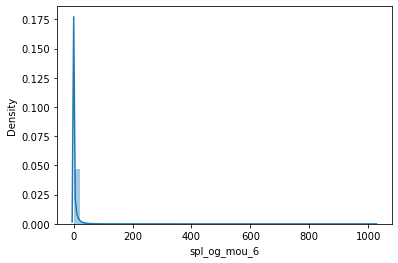

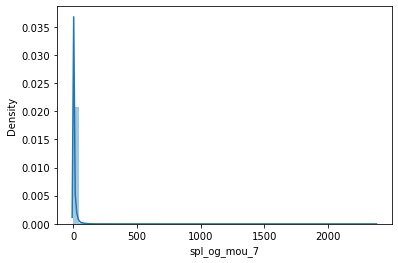

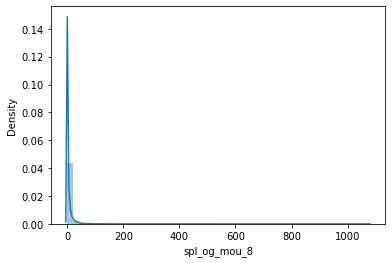

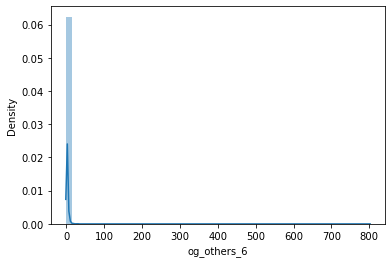

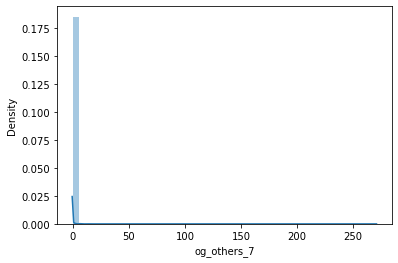

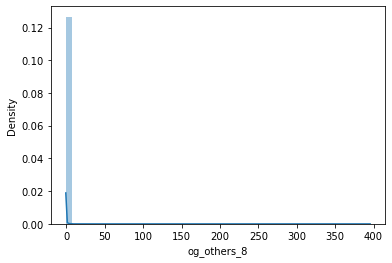

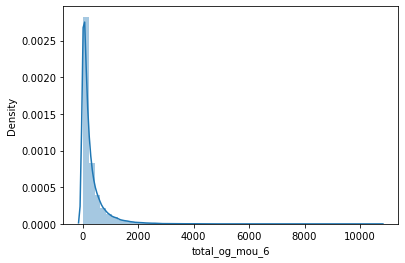

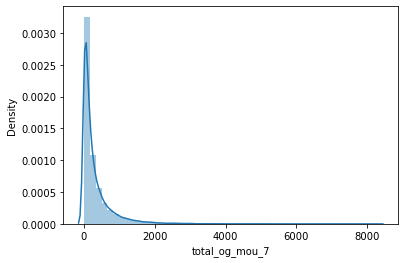

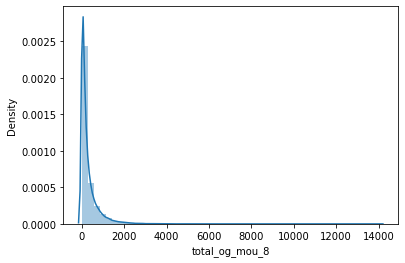

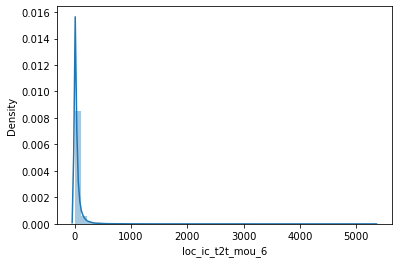

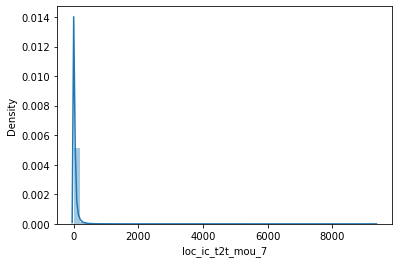

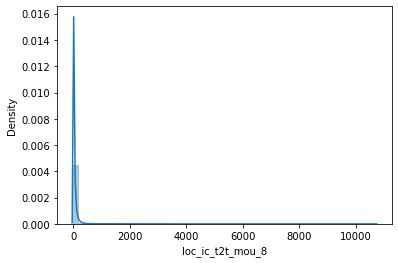

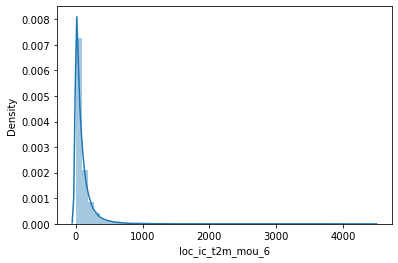

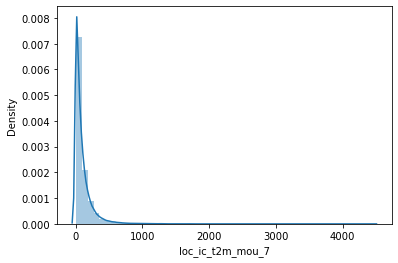

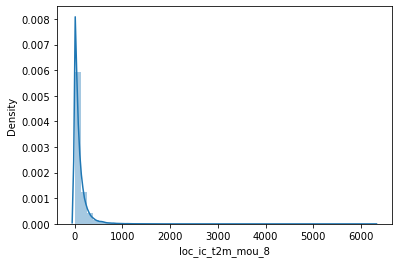

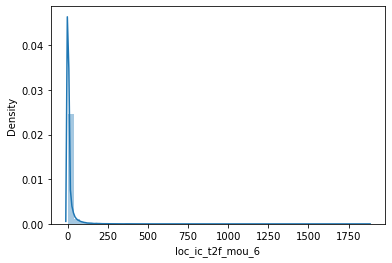

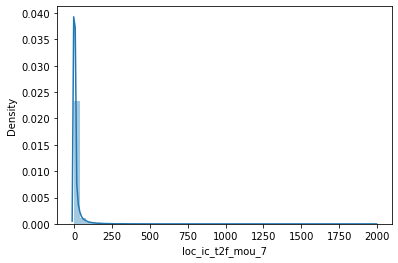

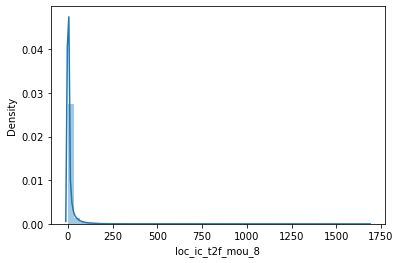

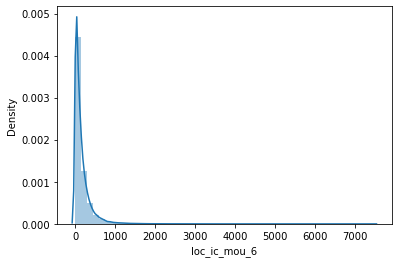

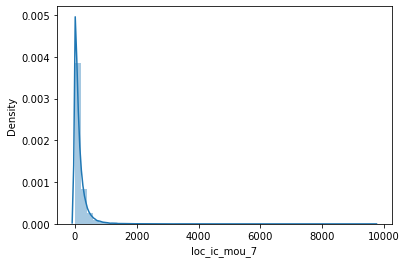

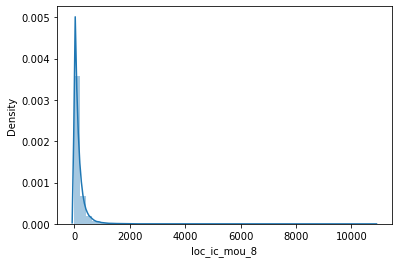

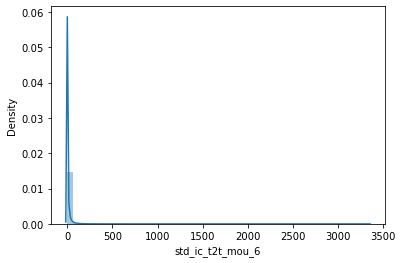

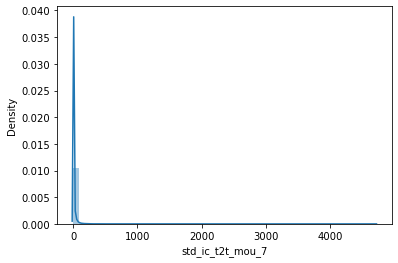

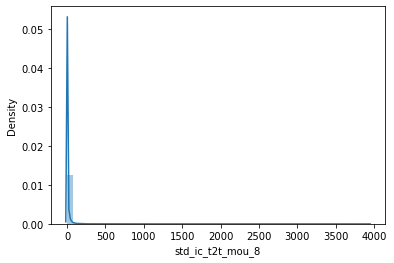

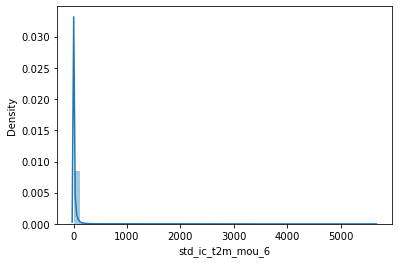

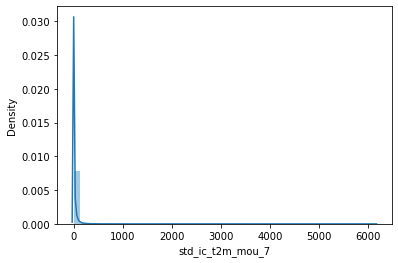

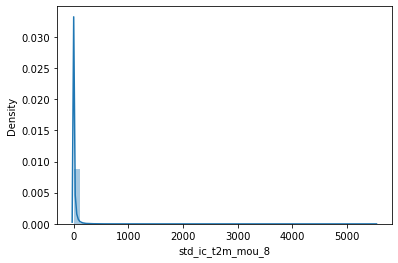

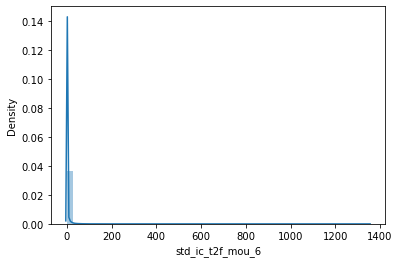

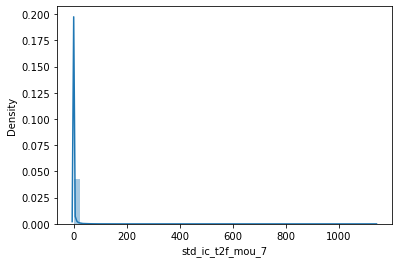

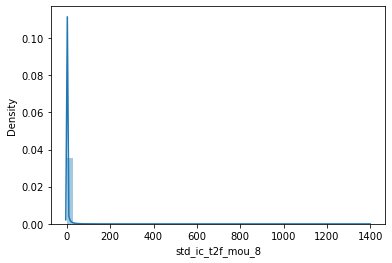

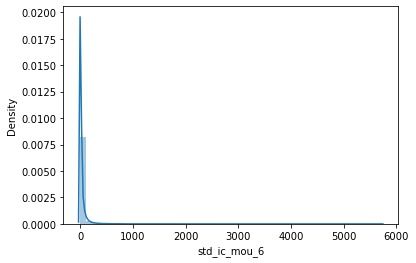

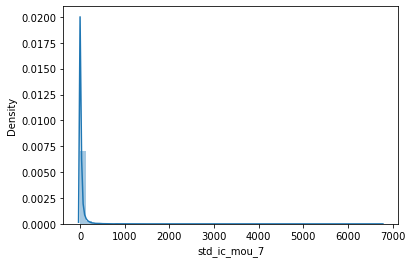

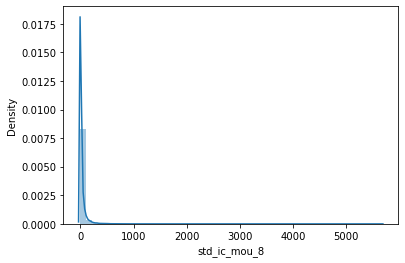

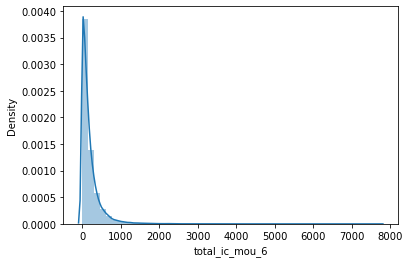

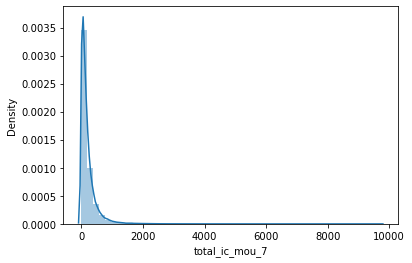

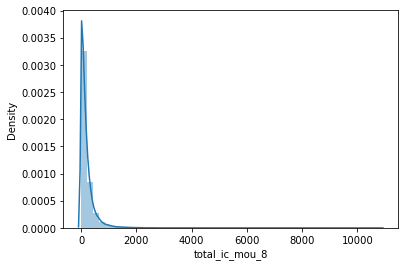

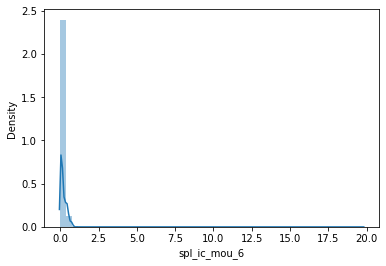

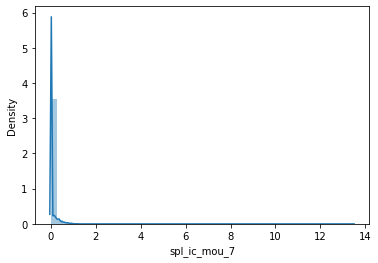

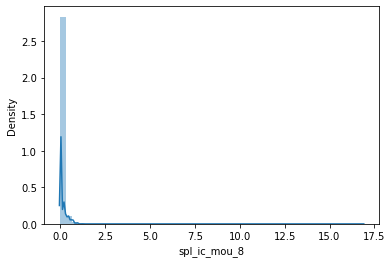

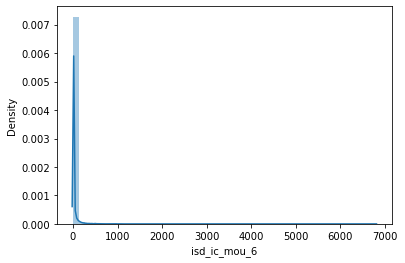

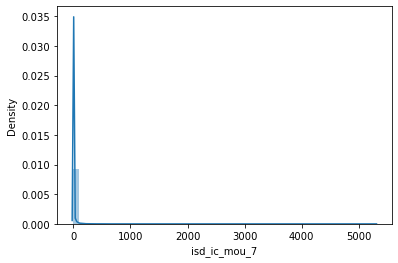

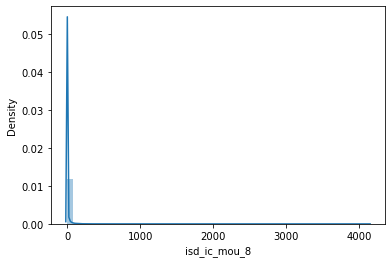

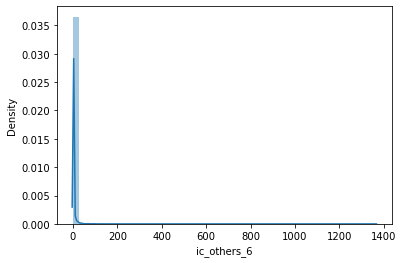

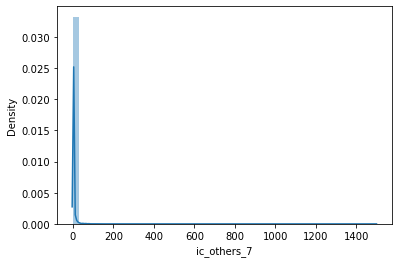

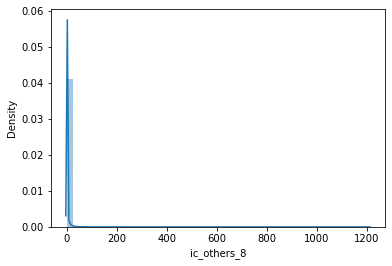

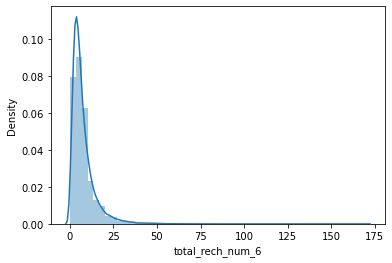

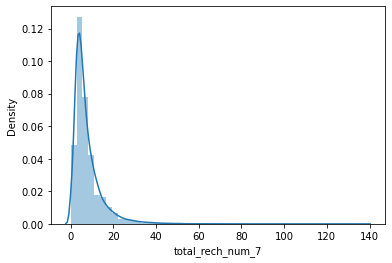

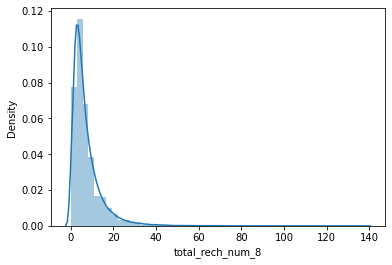

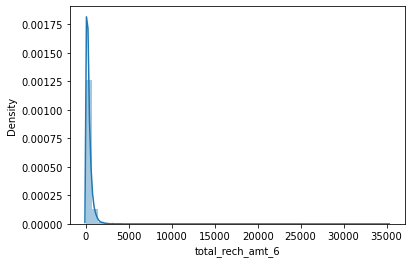

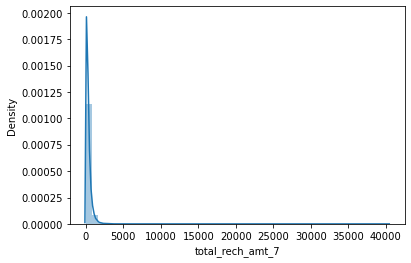

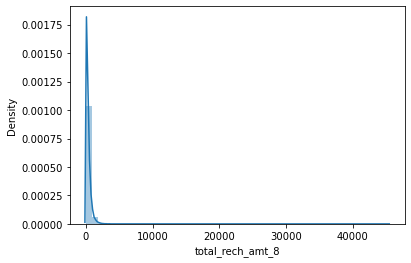

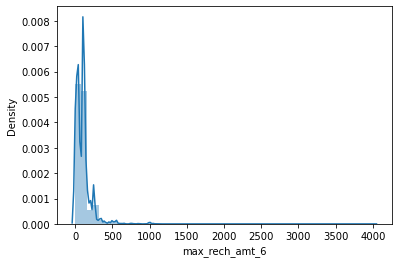

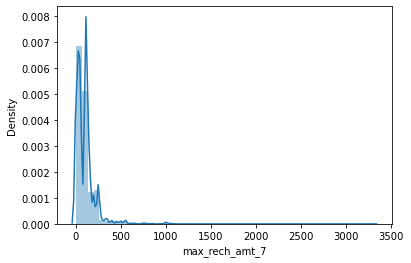

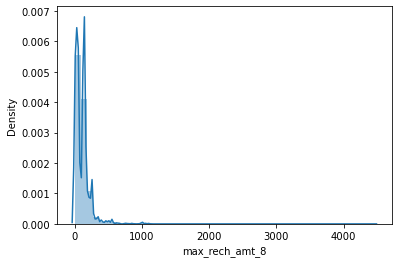

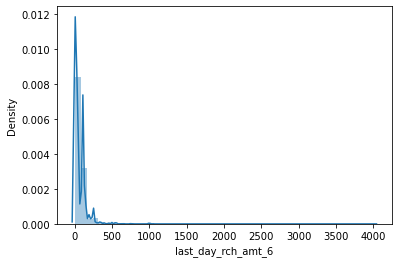

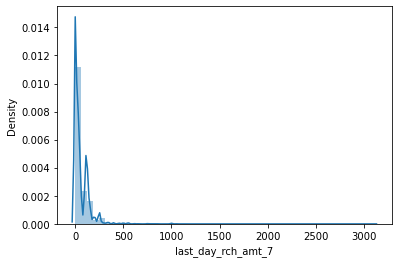

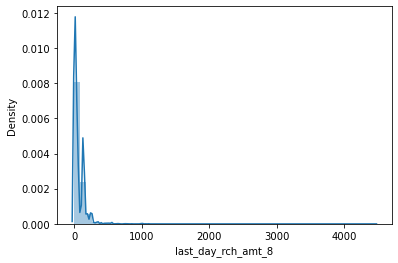

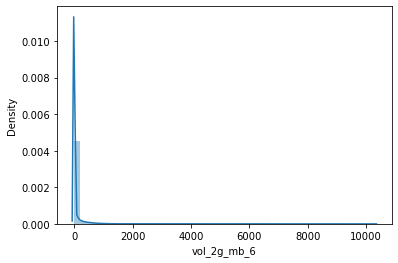

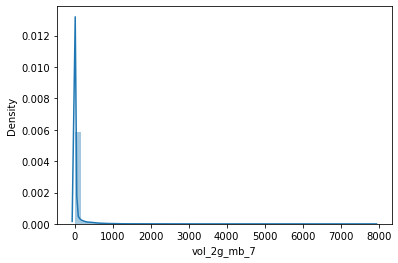

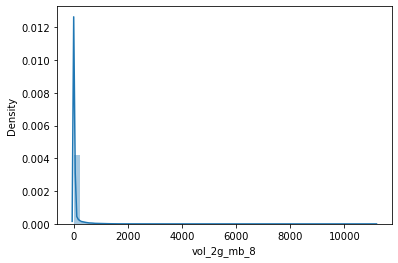

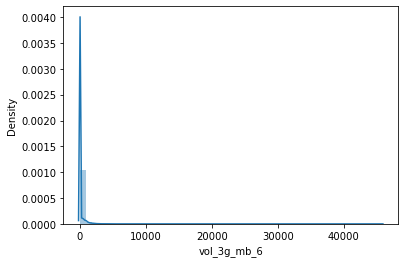

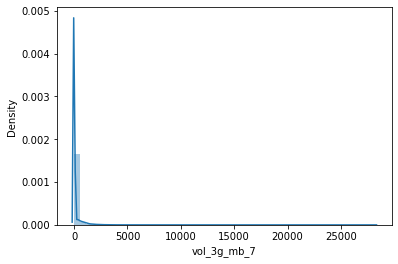

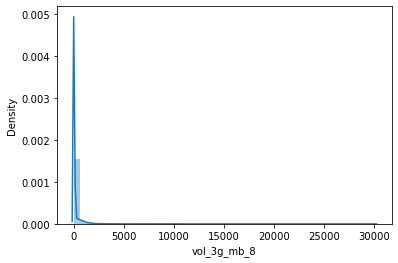

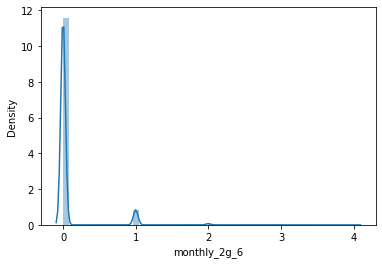

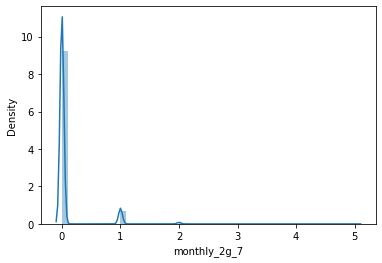

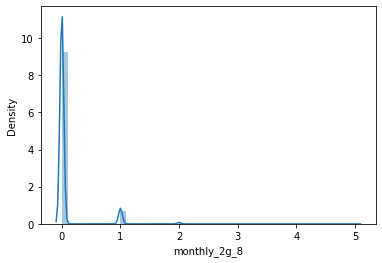

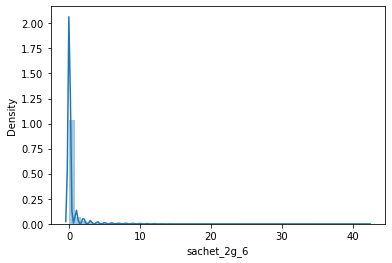

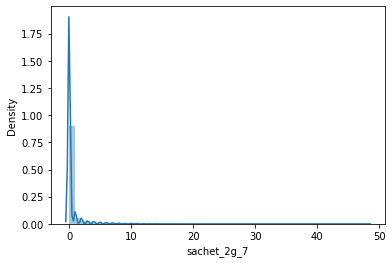

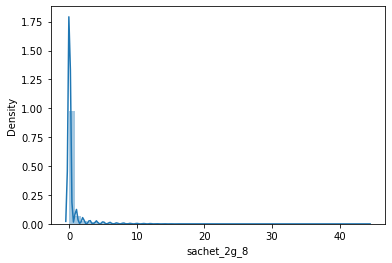

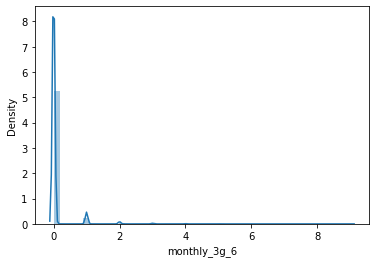

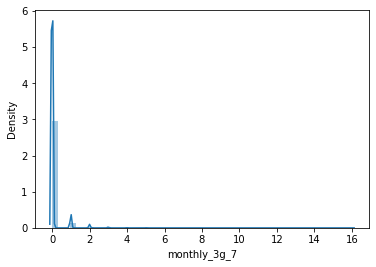

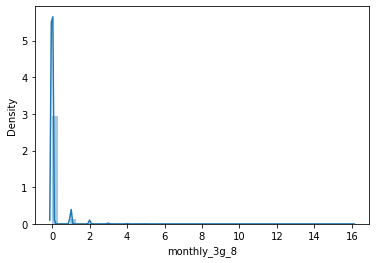

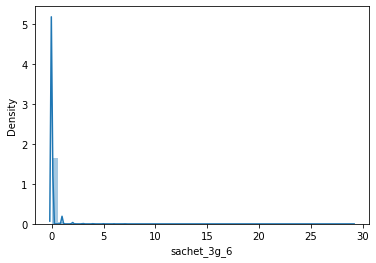

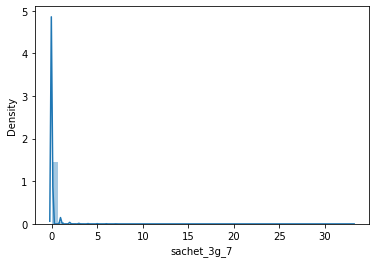

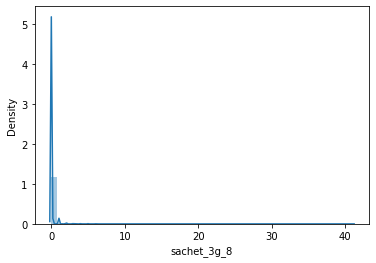

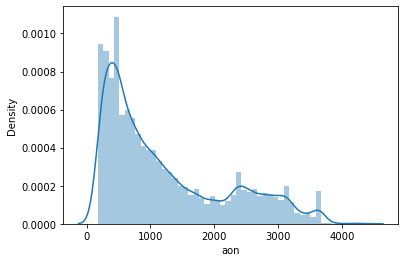

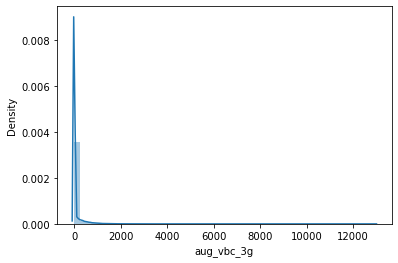

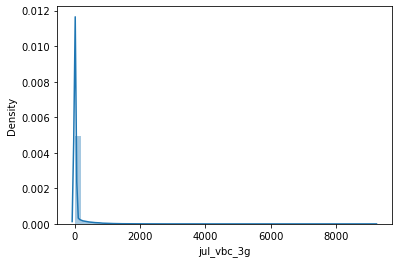

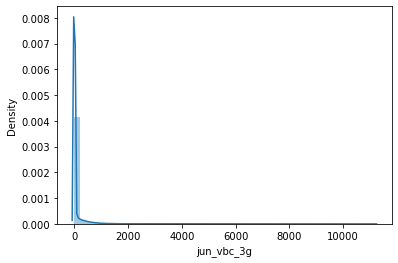

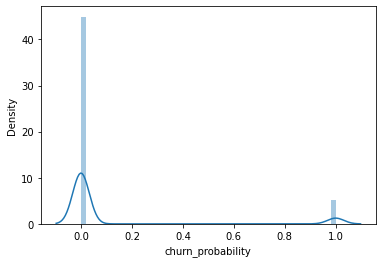

In [24]:
for i in train_df.columns:
    try:
        sns.distplot(train_df[i])
        plt.show()
    except:
        pass

In [25]:
train_df['aon_in_months'] = train_df['aon'].apply(lambda x: round((x/365)*12,2))
train_df['arpu'] = round((train_df['arpu_6']+train_df['arpu_7']+train_df['arpu_8'])/3,2)
train_df['total_revenue'] = train_df['aon_in_months']*train_df['arpu']
train_df['total_revenue']

0        2699.6778
1        1289.5350
2        1585.1400
3        5086.3596
4        3335.5614
           ...    
69994    1831.6038
69995    5579.3053
69996    8768.5490
69997    1910.1848
69998    7793.2680
Name: total_revenue, Length: 69999, dtype: float64

In [26]:
train_df.drop(columns = ['aon','aon_in_months','arpu','arpu_6','arpu_7','arpu_8'],axis=1,inplace=True)
train_df.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        48.58       124.38         1.29         32.24         96.68   
1         0.00         0.00         0.00          0.00         25.99   
2         0.53        15.93         0.00         53.99         82.05   
3         7.26        16.01         0.00         68.76         78.48   
4        21.28         4.83         6.13         56.99         38.11   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          2.33           0.00            0.0            0.0           0.00   
1         30.89           0.00            0.0            0.0           0.00   
2          0.00           0.00            0.0            0.0           0.00   
3         50.23           0.00            0.0            0.0           0.00   
4          9.63          53.64            0.0            0.0          15.73   

   ...  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
0  ...             0             0            0            0            0   
1  ...             1             0            0            0            0   
2  ...             0             0            0            0            0   
3  ...             0             0            0            0            0   
4  ...             0             0            0            1            0   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  total_revenue  
0         0.0         0.0         0.0                  0      2699.6778  
1         0.0         0.0         0.0                  0      1289.5350  
2         0.0         0.0         0.0                  0      1585.1400  
3         0.0         0.0         0.0                  0      5086.3596  
4         0.0         0.0         0.0                  0      3335.5614  

[5 rows x 122 columns]

###### Creating new column, in order to differenciate the customers, we want to concentrate model on high value customers 

In [27]:
high_limit = train_df['total_revenue'].quantile(0.7)
low_limit = train_df['total_revenue'].quantile(0.3)
train_df['cust_profile'] = train_df['total_revenue'].apply(lambda x: 'high' if x >= high_limit 
                                else ('low' if x <= low_limit else 'medium'))
train_df['cust_profile'].value_counts()

medium    27999
high      21000
low       21000
Name: cust_profile, dtype: int64

In [28]:
train_df

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0            48.58       124.38         1.29         32.24         96.68   
1             0.00         0.00         0.00          0.00         25.99   
2             0.53        15.93         0.00         53.99         82.05   
3             7.26        16.01         0.00         68.76         78.48   
4            21.28         4.83         6.13         56.99         38.11   
...            ...          ...          ...           ...           ...   
69994         0.00         7.36        10.93          0.00        488.46   
69995       116.54       196.46       232.63         49.53         96.28   
69996        77.13        68.44        78.44        335.54        227.94   
69997        14.01         7.64         6.71         30.34         16.68   
69998         0.00         0.00         0.00          0.00          0.00   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0              2.33           0.00            0.0            0.0   
1             30.89           0.00            0.0            0.0   
2              0.00           0.00            0.0            0.0   
3             50.23           0.00            0.0            0.0   
4              9.63          53.64            0.0            0.0   
...             ...            ...            ...            ...   
69994        381.64          14.96            0.0            0.0   
69995         48.06           0.00            0.0            0.0   
69996        263.84           0.00            0.0            0.0   
69997         12.56          25.06            0.0            0.0   
69998          0.00           0.00            0.0            0.0   

       roam_og_mou_6  ...  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
0               0.00  ...             0            0            0   
1               0.00  ...             0            0            0   
2               0.00  ...             0            0            0   
3               0.00  ...             0            0            0   
4              15.73  ...             0            0            1   
...              ...  ...           ...          ...          ...   
69994           0.00  ...             0            0            1   
69995           0.00  ...             0            0            0   
69996           0.00  ...             0            0            0   
69997           4.58  ...             1            0            0   
69998           0.00  ...             0            0            0   

       sachet_3g_8  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  \
0                0        0.00        0.00        0.00                  0   
1                0        0.00        0.00        0.00                  0   
2                0        0.00        0.00        0.00                  0   
3                0        0.00        0.00        0.00                  0   
4                0        0.00        0.00        0.00                  0   
...            ...         ...         ...         ...                ...   
69994            0        0.00        0.00        0.00                  0   
69995            0        0.00        0.00        0.00                  0   
69996            0        0.00        0.00        0.00                  0   
69997            0      664.25     1402.96      990.97                  0   
69998            0        0.00        0.00        0.00                  0   

       total_revenue  cust_profile  
0          2699.6778           low  
1          1289.5350           low  
2          1585.1400           low  
3          5086.3596        medium  
4          3335.5614        medium  
...              ...           ...  
69994      1831.6038           low  
69995      5579.3053        medium  
69996      8768.5490        medium  
69997      1910.1848           low  
69998      7793.2680        medium  

[69999 rows x 123 columns]

#### Step 1: Inference 

 - The Date field, features having only one value, features have all unique values and features with more than 70 % of missing values have been dropped.
 - The missing values have been imputed by 0, based on the distribution plot on the various parameters.
 - New dervived fields <b>total_revenue</b> and <b>customer profile</b> indicating customer with high meduim and low profiles were derived 


### Step 2: Data Visualisation
##### Multicollinearity analysis, scatter plot, box plot for outlier removal, heat map etc, Univariate and Bivariate analysis (Visualisation).

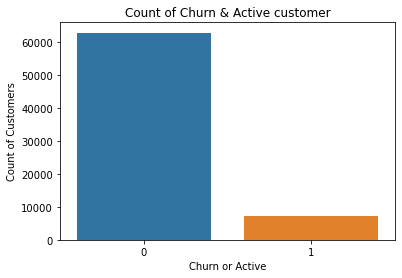

In [29]:
# Count plot
sns.countplot(x="churn_probability", data=train_df)
plt.title('Count of Churn & Active customer')
plt.xlabel("Churn or Active")
plt.ylabel('Count of Customers')
plt.show()

#### Overfitting might happen due to higher class imbalance

In [30]:
train_df['cust_profile'].value_counts()

medium    27999
high      21000
low       21000
Name: cust_profile, dtype: int64

In [31]:
train_df[list(train_df.dtypes[train_df.dtypes!='object'].index)].corr()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
onnet_mou_6           1.000000     0.733298     0.595747      0.204116   
onnet_mou_7           0.733298     1.000000     0.787288      0.156997   
onnet_mou_8           0.595747     0.787288     1.000000      0.132218   
offnet_mou_6          0.204116     0.156997     0.132218      1.000000   
offnet_mou_7          0.146268     0.197344     0.167722      0.739430   
...                        ...          ...          ...           ...   
aug_vbc_3g           -0.011448    -0.008113    -0.002745      0.017833   
jul_vbc_3g           -0.010826    -0.006742    -0.006465      0.018040   
jun_vbc_3g           -0.006267    -0.011190    -0.007070      0.024786   
churn_probability     0.044394    -0.014095    -0.084166      0.018854   
total_revenue         0.224038     0.236893     0.231893      0.360970   

                   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
onnet_mou_6            0.146268      0.114708       0.046785       0.044693   
onnet_mou_7            0.197344      0.157654       0.054112       0.030992   
onnet_mou_8            0.167722      0.201413       0.057510       0.033845   
offnet_mou_6           0.739430      0.567907       0.066727       0.055043   
offnet_mou_7           1.000000      0.755802       0.072341       0.050741   
...                         ...           ...            ...            ...   
aug_vbc_3g             0.016782      0.025890       0.021445       0.023728   
jul_vbc_3g             0.015536      0.016892       0.018190       0.026437   
jun_vbc_3g             0.010485      0.011161       0.026021       0.035039   
churn_probability     -0.045841     -0.131012       0.039684       0.053837   
total_revenue          0.363389      0.342431       0.092859       0.067168   

                   roam_ic_mou_8  roam_og_mou_6  ...  monthly_3g_7  \
onnet_mou_6             0.055267       0.116909  ...      0.000609   
onnet_mou_7             0.048887       0.111917  ...      0.005638   
onnet_mou_8             0.036760       0.115757  ...      0.004938   
offnet_mou_6            0.061522       0.153611  ...      0.022960   
offnet_mou_7            0.064475       0.141815  ...      0.029679   
...                          ...            ...  ...           ...   
aug_vbc_3g              0.039383       0.016121  ...      0.368979   
jul_vbc_3g              0.027081       0.011195  ...      0.449780   
jun_vbc_3g              0.032364       0.017223  ...      0.363529   
churn_probability       0.050802       0.051263  ...     -0.024695   
total_revenue           0.075032       0.137766  ...      0.198957   

                   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
onnet_mou_6           -0.004685    -0.000900     0.008719    -0.007985   
onnet_mou_7           -0.003810    -0.004965     0.001922    -0.003152   
onnet_mou_8            0.001462    -0.004854     0.008136     0.001447   
offnet_mou_6           0.024893     0.002430    -0.001376    -0.002087   
offnet_mou_7           0.024900    -0.002755     0.001581    -0.000742   
...                         ...          ...          ...          ...   
aug_vbc_3g             0.442081     0.089433     0.089689     0.101584   
jul_vbc_3g             0.372204     0.105736     0.103164     0.085656   
jun_vbc_3g             0.343072     0.103249     0.093014     0.077467   
churn_probability     -0.048303    -0.000936    -0.011153    -0.031369   
total_revenue          0.200955     0.026633     0.031215     0.025972   

                   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  \
onnet_mou_6         -0.011448   -0.010826   -0.006267           0.044394   
onnet_mou_7         -0.008113   -0.006742   -0.011190          -0.014095   
onnet_mou_8         -0.002745   -0.006465   -0.007070          -0.084166   
offnet_mou_6         0.017833    0.018040    0.024786           0.018854   
offnet_mou_7         0.016782    0.015536    0.010485          -0.04584

##### checking the correlation between few features 

In [32]:
actual_col =[]
month_col = []
new_col = []
for i in train_df.columns:
    i = i.lower()
    x = i.split('_')
    if '6' in x or 'jun' in x:
        month = 6
        col = i.replace("_6","").replace('jun_','').replace("__","_")
    elif '7' in x or 'jul' in x:
        month = 7
        col = i.replace("_7","").replace('jul_','').replace("__","_")
    elif '8' in x or 'aug' in x:
        month = 8
        col = i.replace("_8","").replace('aug_','').replace("__","_")
    else:
        month = 0
        col = i
    actual_col.append(i)
    month_col.append(month)
    new_col.append(col)

col_name = pd.DataFrame([actual_col,month_col,new_col],index=['actual_col','month_col','new_col']).T
col_name

actual_col month_col            new_col
0          onnet_mou_6         6          onnet_mou
1          onnet_mou_7         7          onnet_mou
2          onnet_mou_8         8          onnet_mou
3         offnet_mou_6         6         offnet_mou
4         offnet_mou_7         7         offnet_mou
..                 ...       ...                ...
118         jul_vbc_3g         7             vbc_3g
119         jun_vbc_3g         6             vbc_3g
120  churn_probability         0  churn_probability
121      total_revenue         0      total_revenue
122       cust_profile         0       cust_profile

[123 rows x 3 columns]

In [33]:
grp = col_name.groupby(by=['new_col'])
col_list_3 = []
col_list_2 = []
for name, df_grp in grp:
    li = list(df_grp['actual_col'].unique())
    if len(li) ==3:
        train_df[name] = round(((train_df[li[0]]+train_df[li[1]]+train_df[li[2]])/3),2)
        col_list_3.append(name)
    else:
        col_list_2.append(name)

In [34]:
for_vis = col_list_2+col_list_3
len(for_vis)

43

In [35]:
df_vis = train_df[for_vis]
train_df.drop(columns=col_list_3,axis=1,inplace = True)
df_vis

churn_probability cust_profile  total_revenue  ic_others  isd_ic_mou  \
0                      0          low      2699.6778       0.60        0.00   
1                      0          low      1289.5350       0.00        0.00   
2                      0          low      1585.1400       0.08        0.00   
3                      0       medium      5086.3596       0.00        0.00   
4                      0       medium      3335.5614       0.00        0.00   
...                  ...          ...            ...        ...         ...   
69994                  0          low      1831.6038       0.00        0.00   
69995                  0       medium      5579.3053       0.03        0.00   
69996                  0       medium      8768.5490       2.74        1.70   
69997                  0          low      1910.1848       0.00        0.00   
69998                  0       medium      7793.2680       1.05        0.18   

       isd_og_mou  last_day_rch_amt  loc_ic_mou  loc_ic_t2f_mou  \
0            0.00             43.33       17.58            0.00   
1            0.00              0.00       22.64            1.80   
2            0.00             40.00       51.91            0.00   
3            0.00             90.00       72.38            2.68   
4            0.00             21.67       19.74            5.09   
...           ...               ...         ...             ...   
69994        0.00             66.67      152.58            0.35   
69995        0.00             40.67       56.80            0.86   
69996        0.07            192.33      451.66          241.00   
69997        0.00              0.00        9.93            2.48   
69998        0.00             66.00       28.93            2.07   

       loc_ic_t2m_mou  ...  std_og_t2f_mou  std_og_t2m_mou  std_og_t2t_mou  \
0               12.94  ...            0.00           33.12           57.24   
1               10.39  ...            0.00            0.00            0.00   
2               46.18  ...            0.00           37.00            0.98   
3               51.79  ...            0.19           15.29            4.11   
4               11.47  ...            0.00            1.45            0.00   
...               ...  ...             ...             ...             ...   
69994          132.08  ...            0.00          234.92            2.88   
69995           28.58  ...            0.00            9.64          166.42   
69996          156.23  ...            0.00            0.00            8.05   
69997            2.09  ...            0.00            7.90            0.72   
69998           24.36  ...            0.00            0.00            0.00   

       total_ic_mou  total_og_mou  total_rech_amt  total_rech_num   vbc_3g  \
0             35.15        102.17           50.67            2.33     0.00   
1             22.64         20.80           65.00            4.00     0.00   
2             64.92         51.95           63.33            2.67     0.00   
3             76.38         75.28          176.67            3.00     0.00   
4             19.74         40.65          182.67           10.33     0.00   
...             ...           ...             ...             ...      ...   
69994        163.85        296.42          319.67           10.33     0.00   
69995        109.56        246.55          273.67            8.33     0.00   
69996        457.77        350.45          424.33            2.67     0.00   
69997         17.61         27.80          258.67            3.33  1019.39   
69998         35.60          0.00          148.67            2.00     0.00   

       vol_2g_mb  vol_3g_mb  
0           0.00       0.00  
1         117.64       1.32  
2           0.00       0.00  
3           0.00       0.00  
4         304.39       0.00  
...          ...        ...  
69994     129.63       0.00  
69995       0.00       0.00  
69996       0.00       0.00  
69997      49.50    1228.61  
69998     421.08       0.00  

[69999 rows x 43 c

In [36]:
list(df_vis.columns)

['churn_probability',
 'cust_profile',
 'total_revenue',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_amt',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou',
 'total_rech_amt',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb']

In [37]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

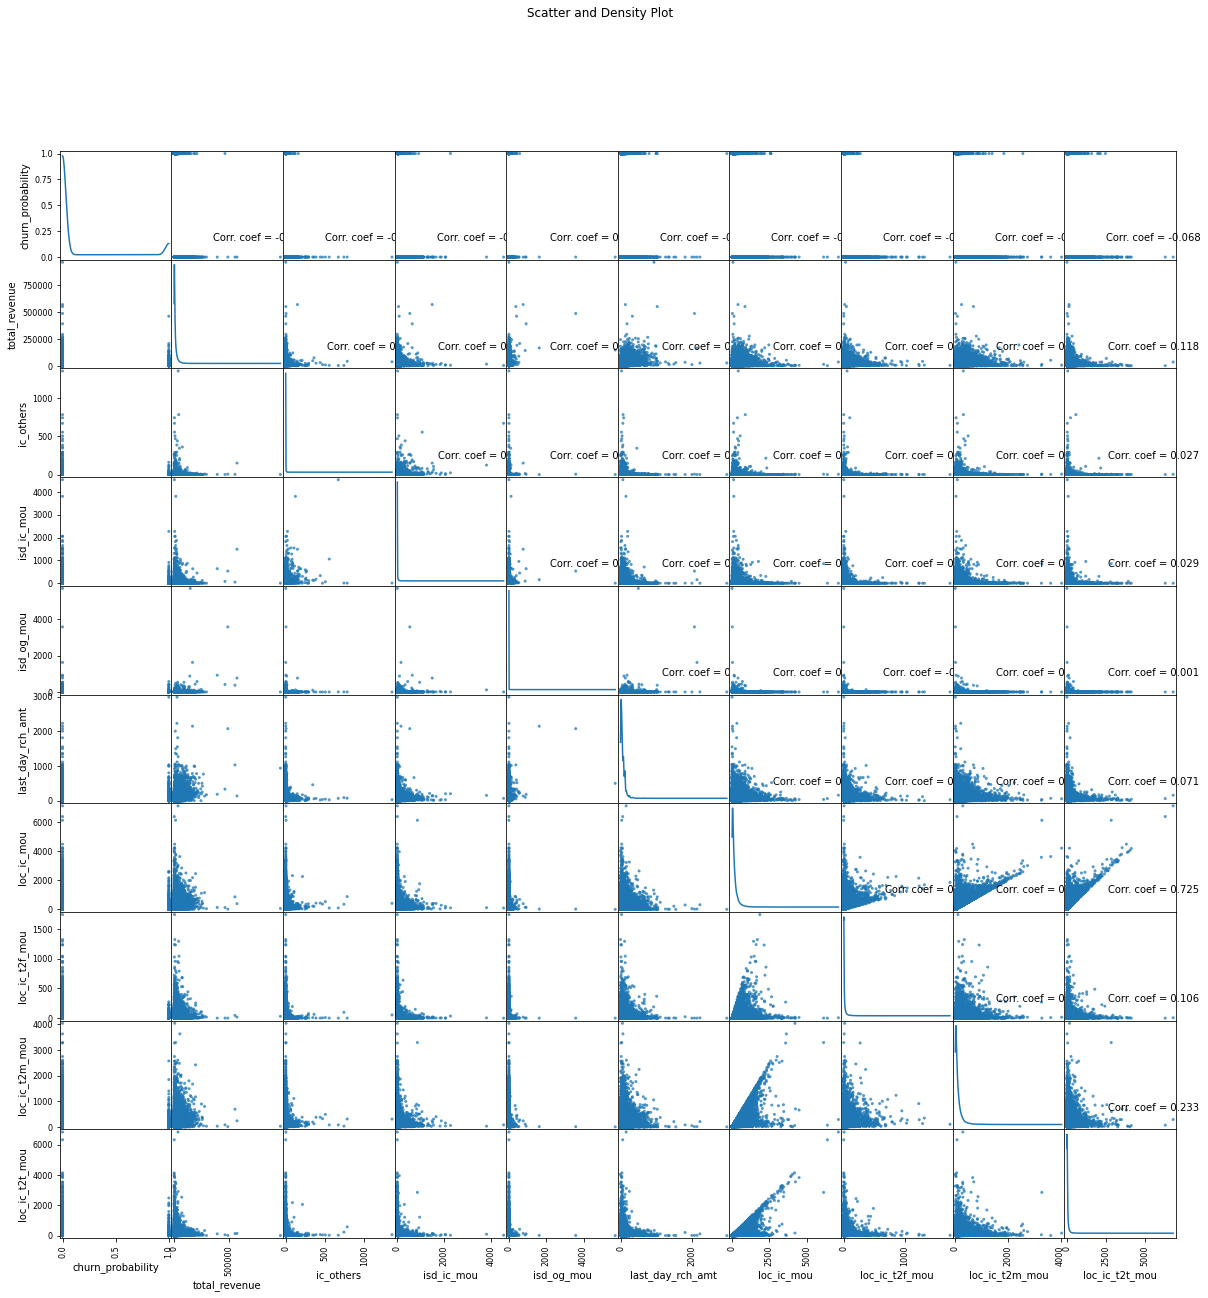

In [38]:
plotScatterMatrix(df_vis, 20, 10)

###### from the above scatter plot, we are observing there is very less co-related, only few features have co -relation, it is evedent in below heat map as well. 

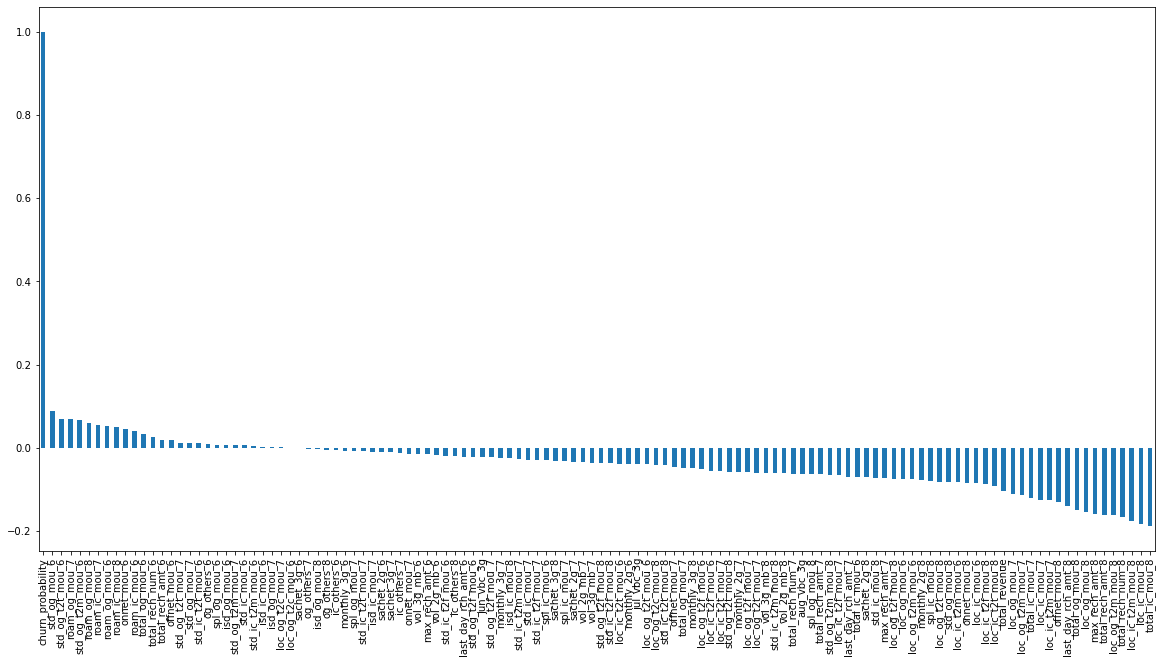

In [39]:
plt.figure(figsize=(20,10))
train_df.corr()['churn_probability'].sort_values(ascending = False).plot(kind='bar')
plt.show()

##### In the above plot we are able to find the positive and negative co-relation features

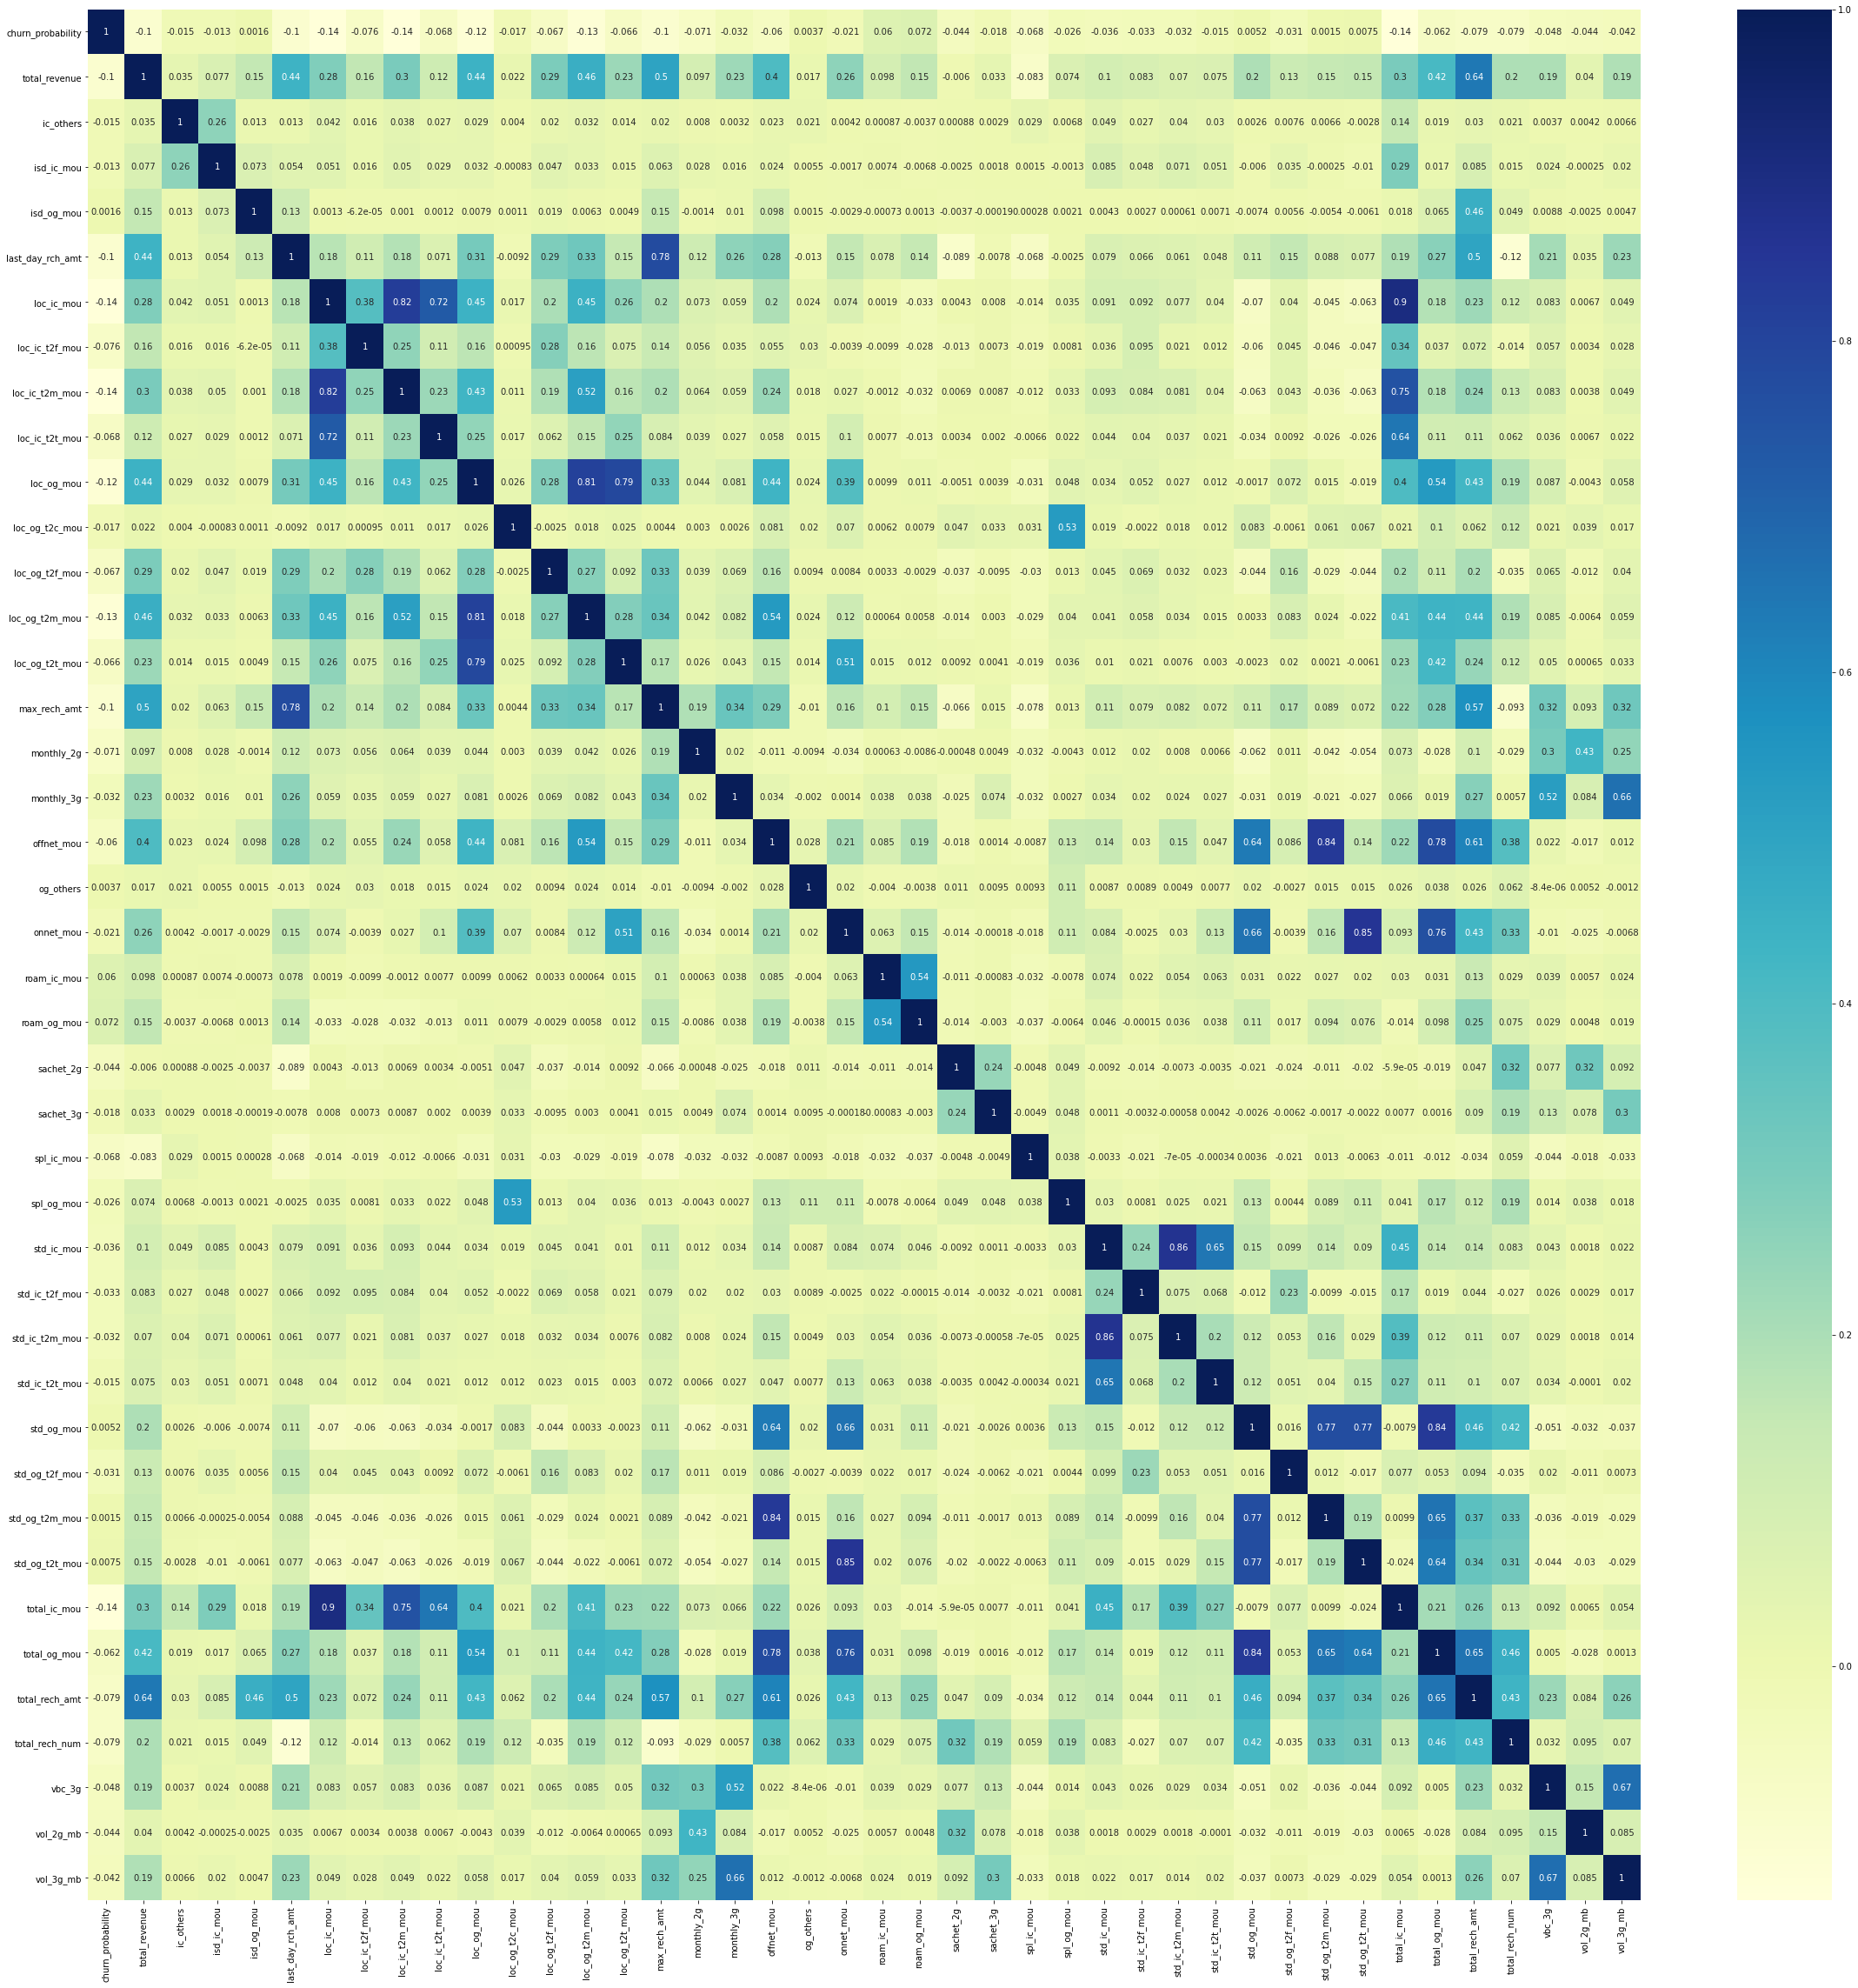

In [40]:
plt.figure(figsize = (40, 40))
sns.heatmap(df_vis.corr(), annot = True, cmap="YlGnBu")
plt.show()

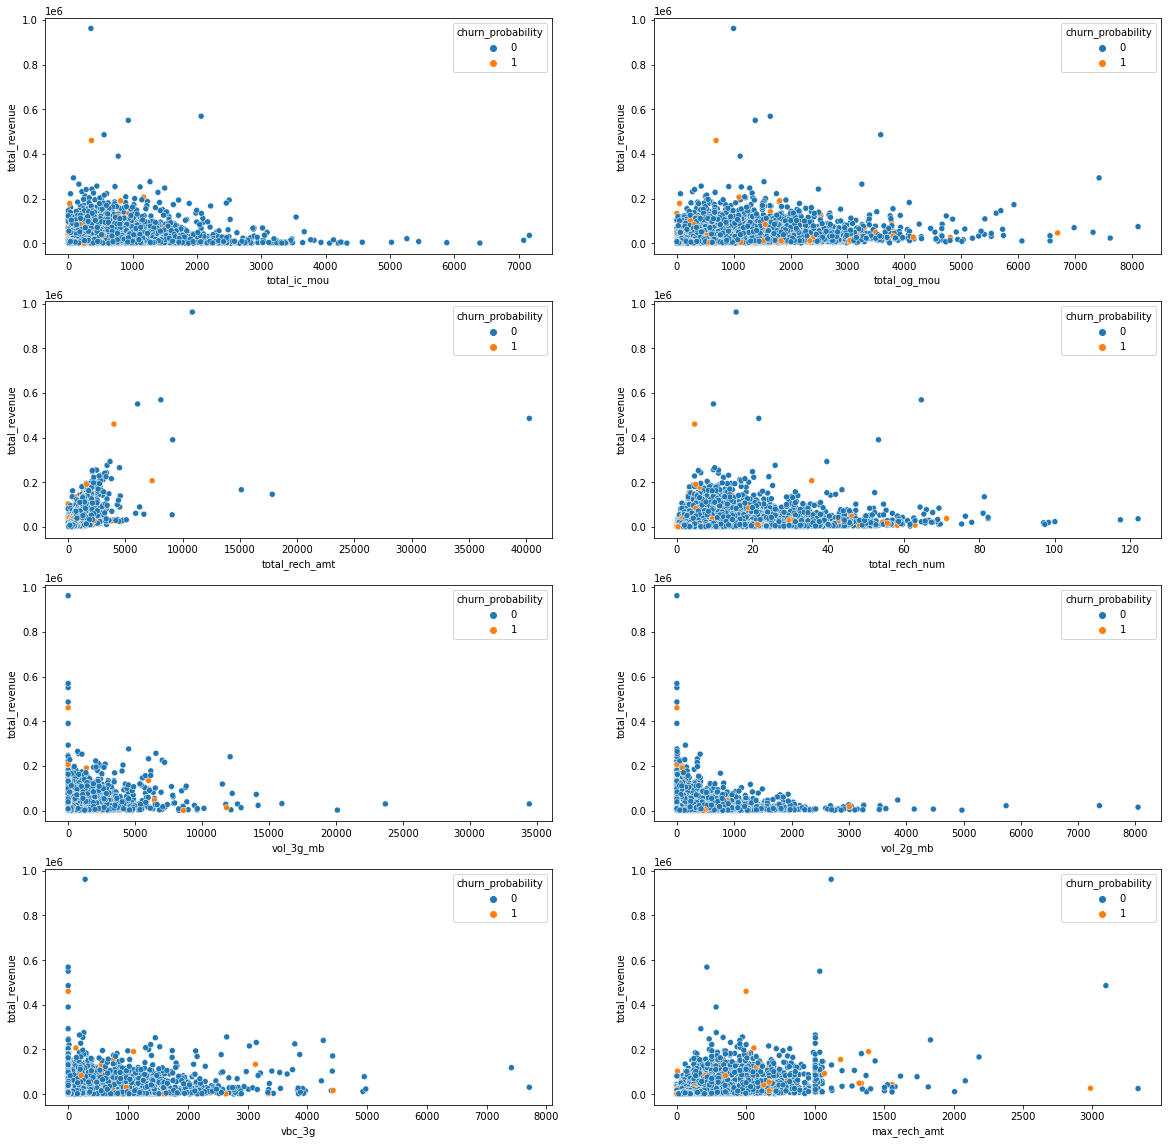

In [41]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
sns.scatterplot(x = 'total_ic_mou', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['churn_probability'])
plt.subplot(4,2,2)
sns.scatterplot(x = 'total_og_mou', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['churn_probability'])
plt.subplot(4,2,3)
sns.scatterplot(x = 'total_rech_amt', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['churn_probability'])
plt.subplot(4,2,4)
sns.scatterplot(x = 'total_rech_num', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['churn_probability'])
plt.subplot(4,2,5)
sns.scatterplot(x = 'vol_3g_mb', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['churn_probability'])
plt.subplot(4,2,6)
sns.scatterplot(x = 'vol_2g_mb', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['churn_probability'])
plt.subplot(4,2,7)
sns.scatterplot(x = 'vbc_3g', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['churn_probability'])
plt.subplot(4,2,8)
sns.scatterplot(x = 'max_rech_amt', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['churn_probability'])
plt.show()

###### Above and below plots gives us the understanding of outliers in dataset and co linearity

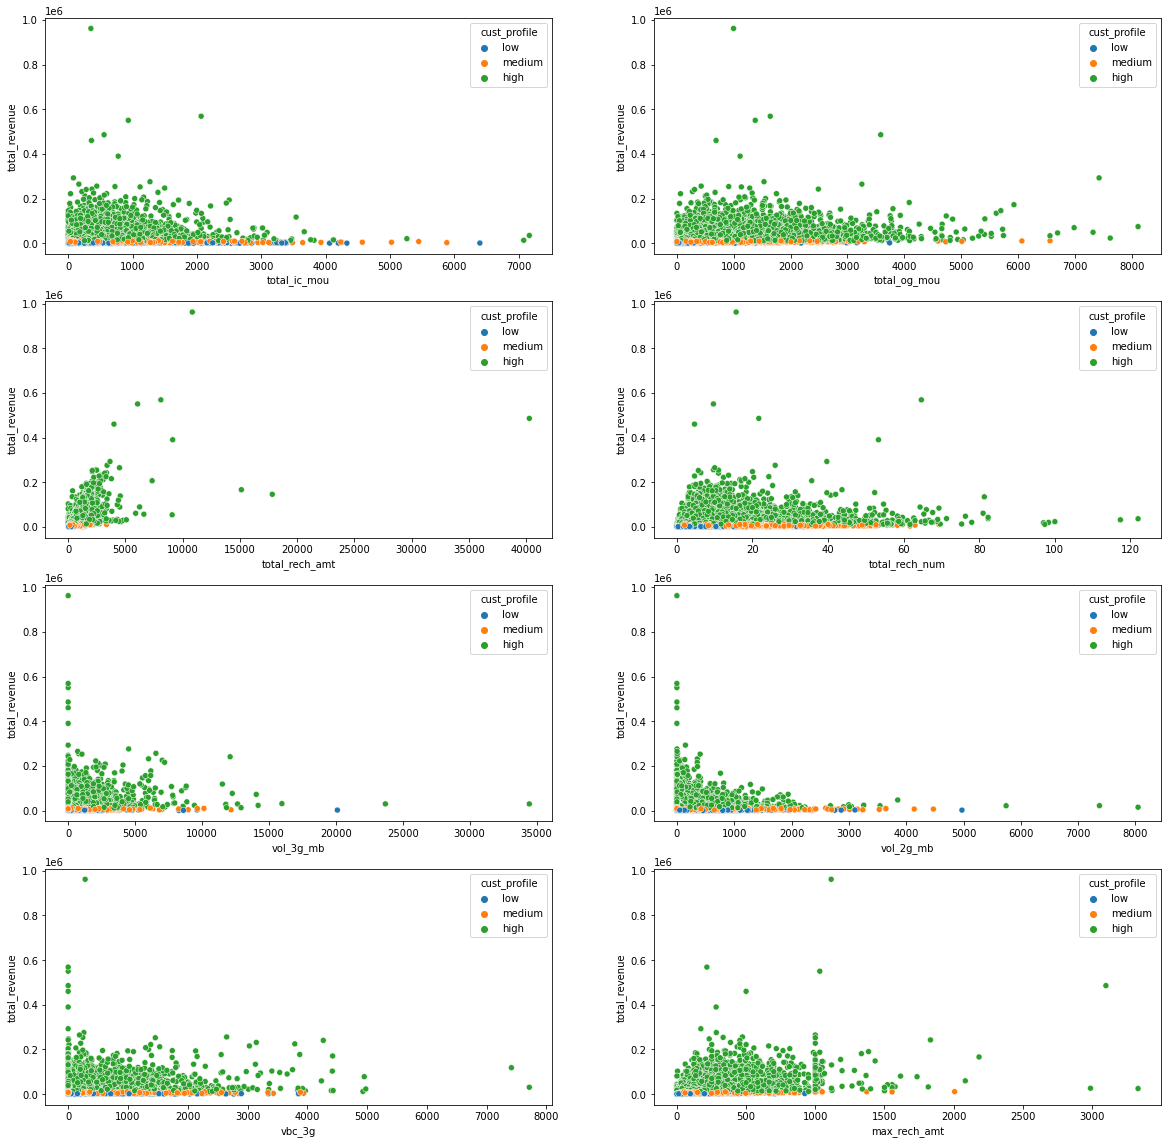

In [42]:
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
sns.scatterplot(x = 'total_ic_mou', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['cust_profile'])
plt.subplot(4,2,2)
sns.scatterplot(x = 'total_og_mou', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['cust_profile'])
plt.subplot(4,2,3)
sns.scatterplot(x = 'total_rech_amt', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['cust_profile'])
plt.subplot(4,2,4)
sns.scatterplot(x = 'total_rech_num', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['cust_profile'])
plt.subplot(4,2,5)
sns.scatterplot(x = 'vol_3g_mb', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['cust_profile'])
plt.subplot(4,2,6)
sns.scatterplot(x = 'vol_2g_mb', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['cust_profile'])
plt.subplot(4,2,7)
sns.scatterplot(x = 'vbc_3g', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['cust_profile'])
plt.subplot(4,2,8)
sns.scatterplot(x = 'max_rech_amt', y = df_vis['total_revenue'], data = df_vis, hue=df_vis['cust_profile'])
plt.show()

<AxesSubplot:xlabel='total_og_mou', ylabel='cust_profile'>

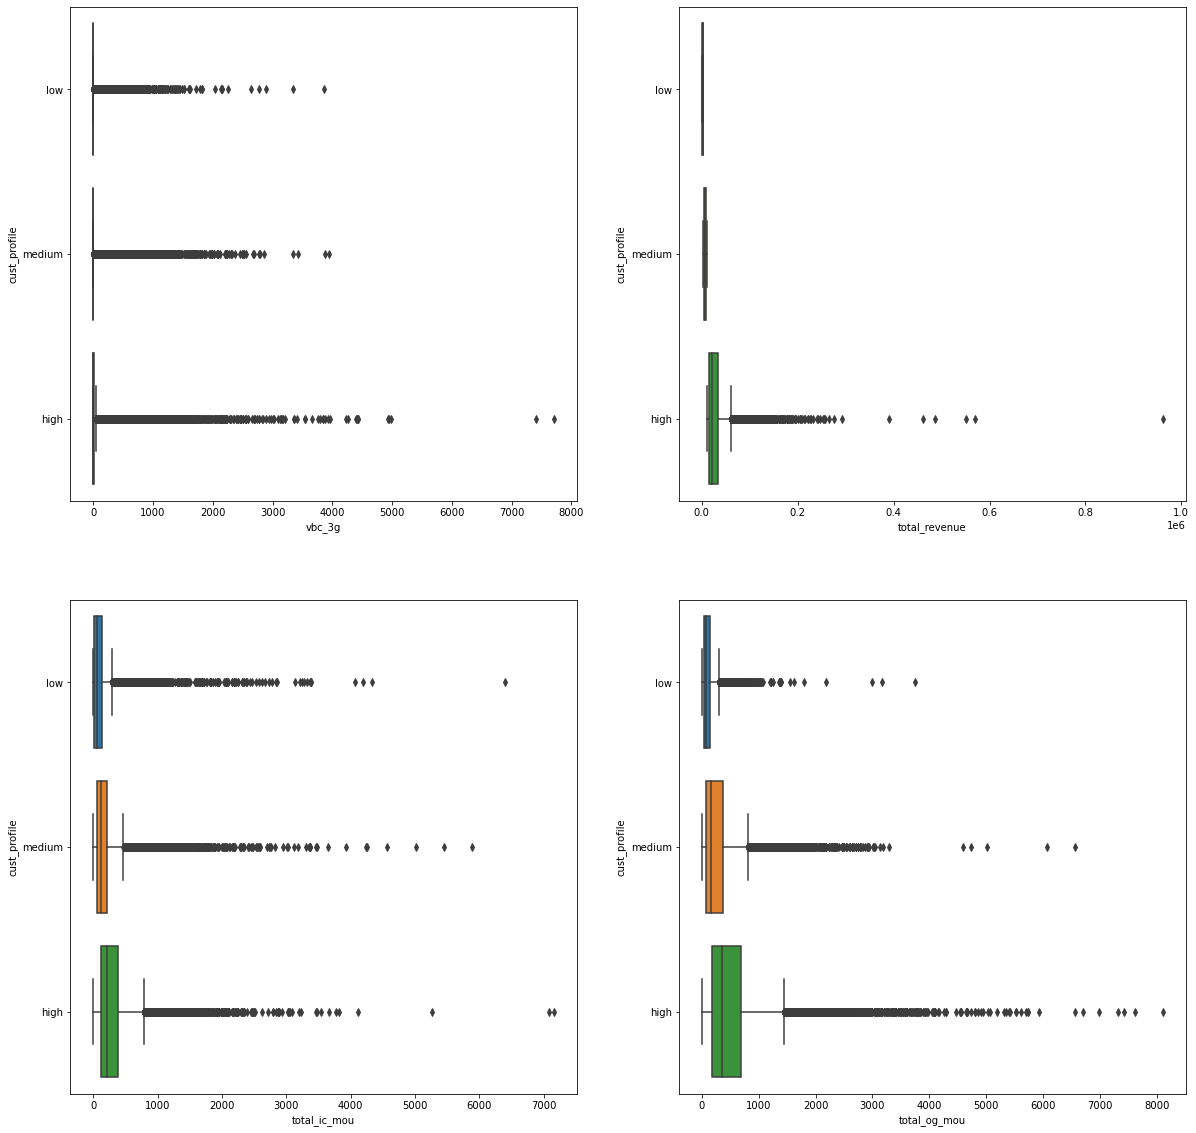

In [43]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.boxplot(x = df_vis['vbc_3g'], y = df_vis['cust_profile'], data = df_vis)
plt.subplot(2,2,2)
sns.boxplot(x = df_vis['total_revenue'], y = df_vis['cust_profile'], data = df_vis)
plt.subplot(2,2,3)
sns.boxplot(x = df_vis['total_ic_mou'], y = df_vis['cust_profile'], data = df_vis)
plt.subplot(2,2,4)
sns.boxplot(x = df_vis['total_og_mou'], y = df_vis['cust_profile'], data = df_vis)

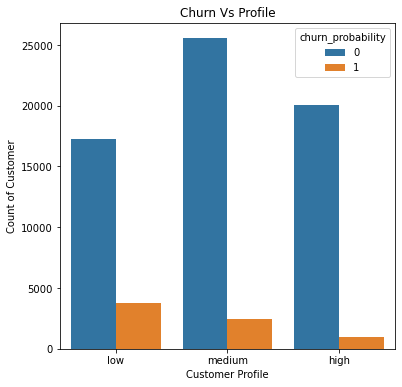

In [44]:
plt.figure(figsize=[6,6])
sns.countplot(x="cust_profile",hue="churn_probability", data=train_df)
plt.title('Churn Vs Profile')
plt.xlabel("Customer Profile")
plt.ylabel('Count of Customer')
plt.show()

###### Above plot tells us the imbalence present in customer profile

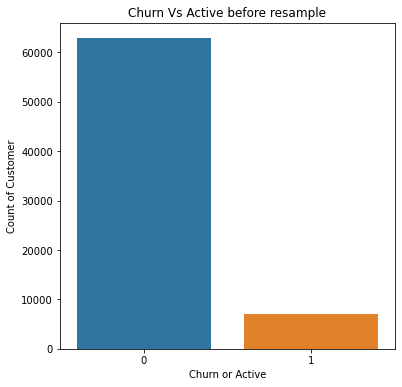

In [45]:
plt.figure(figsize=[6,6])
sns.countplot(x="churn_probability", data=train_df)
plt.title('Churn Vs Active before resample')
plt.xlabel("Churn or Active")
plt.ylabel('Count of Customer')
plt.show()

#### Step 2: Inference 

From the various visualisations made the following inference are evident
 - There is a greater class imbalance between the variable
 - The feature customer profile gives a clear identification how it is related to the toal revenue, mou of incoming, outgoing calls and other parameters used in visualisation.

### Step 3: Data Preperation
##### Class imbalance, create dummy variables and standardise the numerical values, train test split

In [46]:
before_resample = train_df
train_df['cust_profile'] = train_df['cust_profile'].apply(lambda x:2 if x=='high' else (0 if x=='low' else 1) )

In [47]:
y = train_df.loc[:,'churn_probability']
x = train_df.drop(columns=['churn_probability'],axis=1)
print(train_df.shape, x.shape,y.shape)

(69999, 123) (69999, 122) (69999,)


In [48]:

# Instantiate SMOTE
sm = SMOTE(random_state=27)
X_resample, y_resample = sm.fit_resample(x, y)
print(train_df.shape, X_resample.shape, y_resample.shape)

(69999, 123) (125734, 122) (125734,)


In [49]:
train_df = pd.concat([X_resample,y_resample],axis=1)

In [50]:
train_df['cust_profile']

0         0
1         0
2         0
3         1
4         1
         ..
125729    1
125730    2
125731    0
125732    1
125733    2
Name: cust_profile, Length: 125734, dtype: int64

In [51]:
train_df['cust_profile'] = train_df['cust_profile'].apply(lambda x:'high' if x==2 else ('low' if x==0 else 'medium') )

In [52]:
train_df

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0         48.580000   124.380000     1.290000     32.240000     96.680000   
1          0.000000     0.000000     0.000000      0.000000     25.990000   
2          0.530000    15.930000     0.000000     53.990000     82.050000   
3          7.260000    16.010000     0.000000     68.760000     78.480000   
4         21.280000     4.830000     6.130000     56.990000     38.110000   
...             ...          ...          ...           ...           ...   
125729   853.700999   435.839508    18.707335     25.469093     13.115172   
125730   156.419969   172.659136    37.324788    293.171944    620.051393   
125731   126.200044    21.370595     0.352683    236.921065     32.262532   
125732    67.002519    77.116816    16.530089    313.022763    251.146724   
125733     7.736265    27.273564    17.943903      5.041848     37.414943   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           2.330000       0.000000       0.000000       0.000000   
1          30.890000       0.000000       0.000000       0.000000   
2           0.000000       0.000000       0.000000       0.000000   
3          50.230000       0.000000       0.000000       0.000000   
4           9.630000      53.640000       0.000000       0.000000   
...              ...            ...            ...            ...   
125729      2.308972       0.000000       3.616325       2.846103   
125730    109.586124       3.684908       0.000000      48.970397   
125731      6.652884       0.000000       0.765842       0.000000   
125732    189.351232       0.000000      20.941419       5.370198   
125733     23.480914       0.000000       0.000000       4.709949   

        roam_og_mou_6  ...  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
0            0.000000  ...             0            0            0   
1            0.000000  ...             0            0            0   
2            0.000000  ...             0            0            0   
3            0.000000  ...             0            0            0   
4           15.730000  ...             0            0            1   
...               ...  ...           ...          ...          ...   
125729       0.000000  ...             0            0            0   
125730       4.463027  ...             0            0            0   
125731       0.000000  ...             0            0            0   
125732       0.000000  ...             0            0            0   
125733       0.000000  ...             0            0            0   

        sachet_3g_8  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_revenue  \
0                 0    0.000000    0.000000    0.000000    2699.677800   
1                 0    0.000000    0.000000    0.000000    1289.535000   
2                 0    0.000000    0.000000    0.000000    1585.140000   
3                 0    0.000000    0.000000    0.000000    5086.359600   
4                 0    0.000000    0.000000    0.000000    3335.561400   
...             ...         ...         ...         ...            ...   
125729            0    0.000000    0.000000    0.000000    6045.408916   
125730            0    0.000000   47.511549   24.831270   24685.251106   
125731            0    0.000000    0.000000    0.000000    1255.091887   
125732            0    0.000000    0.000000    0.000000    5888.395749   
125733            0  151.260028  494.719866  468.087711   14963.560617   

        cust_profile  churn_probability  
0                low                  0  
1                low                  0  
2                low                  0  
3             medium                  0  
4             medium                  0  
...              ...                ...  
125729        medium                  1  
125730          high                  1  
125731           low                  1  
125732        medium                  1  
125733          high                  1  

[125734 rows x 123 

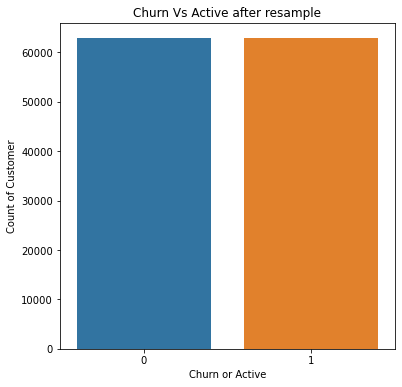

In [53]:
plt.figure(figsize=[6,6])
sns.countplot(x="churn_probability", data=train_df)
plt.title('Churn Vs Active after resample')
plt.xlabel("Churn or Active")
plt.ylabel('Count of Customer')
plt.show()

##### Now we have a clear balence of classes

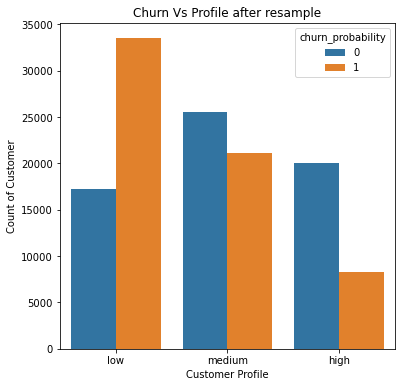

In [54]:
plt.figure(figsize=[6,6])
sns.countplot(x="cust_profile",hue="churn_probability", data=train_df)
plt.title('Churn Vs Profile after resample')
plt.xlabel("Customer Profile")
plt.ylabel('Count of Customer')
plt.show()

##### create dummy variables

In [55]:
profile = pd.get_dummies(train_df['cust_profile'], drop_first=True, prefix='cust_profile')
train_df.drop(columns=['cust_profile'],axis=1,inplace=True)

In [56]:
train_df = pd.concat([train_df,profile],axis=1)

In [57]:
y = train_df.loc[:,'churn_probability']
X = train_df.drop(columns=['churn_probability'],axis=1)
print(train_df.shape, X.shape, y.shape)

(125734, 124) (125734, 123) (125734,)


##### Train_Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [59]:
columns = list(X_train.columns)
columns

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 

###### Scaling

In [60]:
scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])

In [61]:
X_test[columns] = scaler.transform(X_test[columns])

#### Step 3: Inference 

From the above steps it is evident that 
 - There is a high class imbalance that can lead to overfitting decreased sensitivity, hence balanced class has been created using SMOTE
 - The numerical features are scaled and categorical variables are encoded using get_dummies
 - The data set prepared for model is split into 70-30 for training and test respectively.

### Step 4: Basic Model Building
##### Build Logistic Regression, Decision Tree classifier, random forest Classifier with hyperparameter tuning using Grid search CV to identify the important features and best model.

In [62]:
# Basic Logistic Regression building.
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred_log =  model.predict(X_test)

In [64]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_true=y_test,y_pred=y_pred_log)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_true=y_test,y_pred=y_pred_log))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[15129  3802]
 [ 2195 16595]]
Accuracy:- 0.8410169401659553
Sensitivity:- 0.8831825439063331
Specificity:- 0.7991653901008927


##### Decision Tree Model

In [65]:
dt = DecisionTreeClassifier(max_depth=3,random_state=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

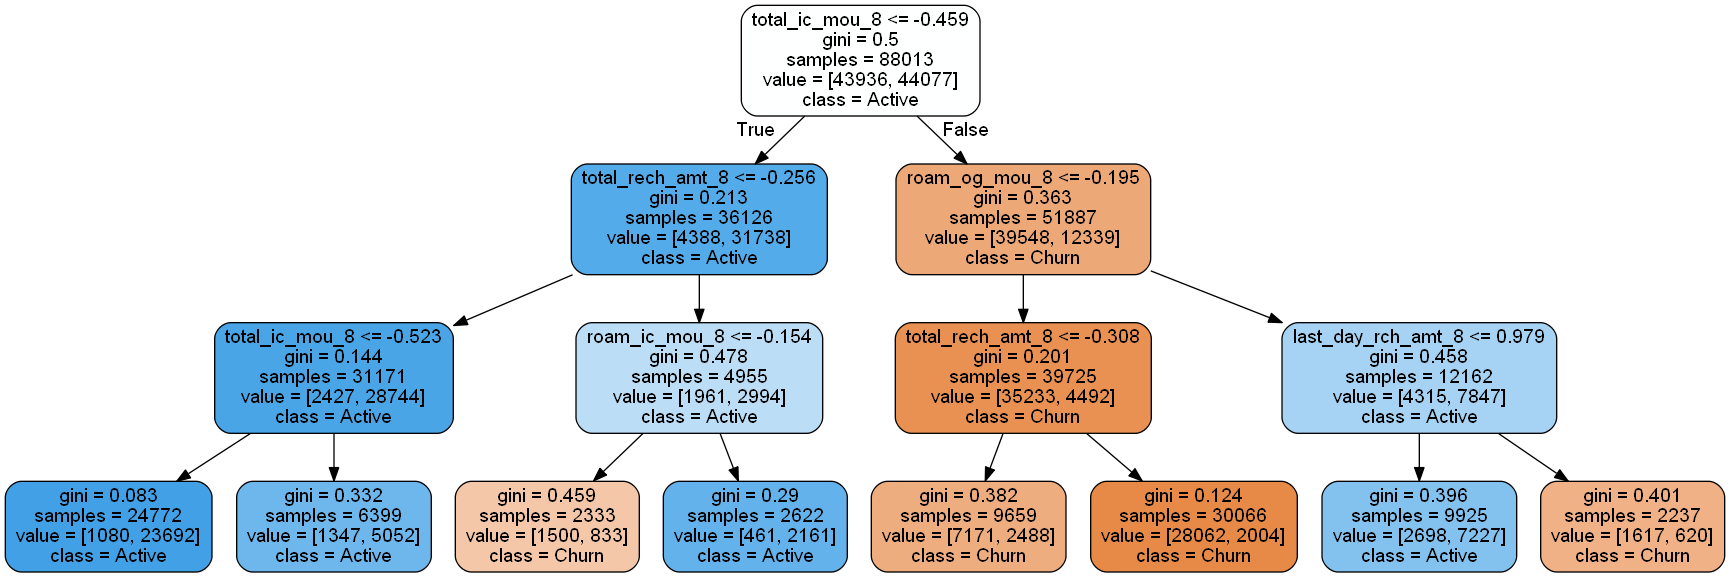

In [66]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns, 
                class_names=['Churn', "Active"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [67]:
dt_default = DecisionTreeClassifier(random_state=100)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [68]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns, 
                    class_names=['Churn', "Active"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [69]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100, 1000],
    'criterion': ["gini", "entropy"]
}

In [70]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [71]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
Wall time: 3min 59s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 1000]},
             scoring='accuracy', verbose=1)

In [72]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.589971      0.016337         0.026044        0.009317   
1       1.604082      0.026526         0.023856        0.003574   
2       1.520789      0.046027         0.020055        0.001045   
3       1.467360      0.034228         0.021782        0.002812   
4       1.484493      0.009569         0.022804        0.003278   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.850482   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.850482   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.850482   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.850482   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.850482   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.849793           0.846794           0.848612          0.84892   
1           0.849793           0.846794           0.848612          0.84892   
2           0.849793           0.846794           0.848612          0.84892   
3           0.849793           0.846794           0.848612          0.84892   
4           0.849793           0.846794           0.848612          0.84892   

   std_test_score  rank_test_score  
0        0.001398               67  
1        0.001398               67  
2        0.001398               67  
3        0.001398               67  
4        0.001398               67

In [73]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
18       7.034145      0.344546         0.030519        0.006917   
19       7.610388      0.418299         0.022068        0.000673   
24      12.467927      0.423092         0.029613        0.003144   
26      10.557665      0.334736         0.026413        0.001575   
32      12.541644      0.851344         0.027421        0.001357   

   param_criterion param_max_depth param_min_samples_leaf  \
18            gini              10                      5   
19            gini              10                     10   
24            gini              20                      5   
26            gini              20                     20   
32            gini              30                     20   

                                               params  split0_test_score  \
18  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.895246   
19  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.894565   
24  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.894065   
26  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.893837   
32  {'criterion': 'gini', 'max_depth': 30, 'min_sa...           0.894201   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
18           0.899695           0.900105           0.899423         0.898617   
19           0.898377           0.898787           0.898832         0.897640   
24           0.899786           0.900241           0.895332         0.897356   
26           0.897332           0.897605           0.899150         0.896981   
32           0.896923           0.897559           0.898968         0.896913   

    std_test_score  rank_test_score  
18        0.001961                1  
19        0.001784                2  
24        0.002700                3  
26        0.001943                4  
32        0.001732                5

In [74]:
grid_search.best_estimator_ 

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)

In [75]:
# Applying the best parameters to Decision Tree
dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=100)
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=100)

In [76]:
# train prediction
X_train_pred = dt_tuned.predict(X_train)

In [77]:

# Confusion metrics
confusion = metrics.confusion_matrix(y_true=y_train, y_pred=X_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_true=y_train, y_pred=X_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[39841  4095]
 [ 3035 41042]]
Accuracy:- 0.9189892402258757
Sensitivity:- 0.9311432266261316
Specificity:- 0.9067962490895849


In [78]:
y_pred_dt = dt_tuned.predict(X_test)

In [79]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_true=y_test,y_pred=y_pred_dt)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_true=y_test,y_pred=y_pred_dt))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[16863  2068]
 [ 1637 17153]]
Accuracy:- 0.9017788499774662
Sensitivity:- 0.912879191059074
Specificity:- 0.8907611853573504


### Random Forest classifier

In [80]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [81]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [82]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring ="recall")

In [83]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
Wall time: 34min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='recall', verbose=1)

In [84]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [85]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 4,
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [86]:
sample_tree = rf_best.estimators_[0]
sample_tree

DecisionTreeClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       random_state=1608637542)

In [87]:

classifier_rf = RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42, oob_score=True)
classifier_rf.fit(X_train, y_train)
classifier_rf.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [88]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
62       loc_ic_mou_8  0.064717
56   loc_ic_t2m_mou_8  0.050898
11      roam_og_mou_8  0.043139
77     total_ic_mou_8  0.042246
50     total_og_mou_8  0.041184
..                ...       ...
111      monthly_3g_6  0.000376
115       sachet_3g_7  0.000361
114       sachet_3g_6  0.000220
47        og_others_8  0.000035
46        og_others_7  0.000030

[123 rows x 2 columns]

In [89]:
for ind, row in imp_df.iterrows():
    if row["Imp"] > 0.03:
        print(row["Varname"], ":",row["Imp"]*100)

roam_ic_mou_8 : 4.095284295967511
roam_og_mou_8 : 4.3138991707027206
loc_og_mou_8 : 3.268021197263665
total_og_mou_8 : 4.118369715495361
loc_ic_t2t_mou_8 : 3.81129590003211
loc_ic_t2m_mou_8 : 5.0898384604029685
loc_ic_mou_8 : 6.471698833834324
total_ic_mou_8 : 4.224585032882958
total_rech_amt_8 : 3.3277572563686255
max_rech_amt_8 : 3.142401434838704


In [90]:
# train prediction
X_train_pred_rf = classifier_rf.predict(X_train)

In [91]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_true=y_train,y_pred=X_train_pred_rf)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_true=y_train,y_pred=X_train_pred_rf))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[42319  1617]
 [ 1121 42956]]
Accuracy:- 0.9688909592901048
Sensitivity:- 0.974567234612156
Specificity:- 0.9631964675892207


In [92]:
# Test data preperation
y_pred_rf = classifier_rf.predict(X_test)

In [93]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_true=y_test,y_pred=y_pred_rf)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_true=y_test,y_pred=y_pred_rf))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[17796  1135]
 [ 1372 17418]]
Accuracy:- 0.9335383473396781
Sensitivity:- 0.9269824374667376
Specificity:- 0.9400454281337489


#### Step 4: Inference 

We can observe that Random Forest has given better performance than Decision Tree, we have improved Accuracy and Sensitivity. We will use this model on unseen data set after building all models

### Step 5: LR using RFE
##### Build a logistic regression model with RFE and check for pvalue and VIF, Evaluation metrics - AUC ROC, accuracy, f1score, recall etc

In [94]:
# Logistic regression model 
logm1 = sts.GLM(y_train,(sts.add_constant(X_train)), family = sts.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                88013
Model:                            GLM   Df Residuals:                    87889
Model Family:                Binomial   Df Model:                          123
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31739.
Date:                Sat, 25 Jun 2022   Deviance:                       63478.
Time:                        19:37:50   Pearson chi2:                 4.50e+15
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4517      0.013    -33.945      0.000      -0.478      -0.426
onnet_mou_6            -1.7120      0.835     -2.051      0.040      -3.348      -0.076
onnet_mou_7            -0.5503      0.645     -0.854      0.393      -1.814       0.713
onnet_mou_8            -0.2250      0.696     -0.323      0.747      -1.590       1.140
offnet_mou_6           -1.0070      0.859     -1.172      0.241      -2.691       0.677
offnet_mou_7           -1.0759      0.622     -1.730      0.084      -2.295       0.143
offnet_mou_8           -1.4801      0.685     -2.159      0.031      -2.824      -0.137
roam_ic_mou_6           0.0417      0.017      2.469      0.014       0.009       0.075
roam_ic_mou_7           0.1130      0.023      4.878      0.000       0.068       0.158
roam_ic_mou_8          -0.0620      0.018     -3.359      0.001      -0.098      -0.026
roam_og_mou_6           0.2447      0.199      1.228      0.219      -0.146       0.635
roam_og_mou_7           0.0758      0.129      0.588      0.556      -0.177       0.328
roam_og_mou_8           0.4686      0.175      2.672      0.008       0.125       0.812
loc_og_t2t_mou_6     2684.4286    269.108      9.975      0.000    2156.987    3211.870
loc_og_t2t_mou_7     2614.1539    255.183     10.244      0.000    2114.005    3114.303
loc_og_t2t_mou_8     5474.1674    248.765     22.005      0.000    4986.597    5961.738
loc_og_t2m_mou_6     2863.1206    287.064      9.974      0.000    2300.486    3425.755
loc_og_t2m_mou_7     2835.2847    276.745     10.245      0.000    2292.874    3377.695
loc_og_t2m_mou_8     6054.4007    275.115     22.007      0.000    5515.186    6593.616
loc_og_t2f_mou_6      229.4546     23.004      9.975      0.000     184.368     274.541
loc_og_t2f_mou_7      239.9745     23.422     10.246      0.000     194.069     285.880
loc_og_t2f_mou_8      510.9197     23.215     22.009      0.000     465.420     556.419
loc_og_t2c_mou_6       -0.0309      0.015     -2.091      0.037      -0.060      -0.002
loc_og_t2c_mou_7        0.1113      0.017      6.657      0.000       0.079       0.144
loc_og_t2c_mou_8        0.0072      0.015      0.483      0.629      -0.022       0.036
loc_og_mou_6        -4879.9975    568.525     -8.584      0.000   -5994.287   -3765.709
loc_og_mou_7        -5019.3572    567.977     -8.837      0.000   -6132.572   -3906.142
loc_og_mou_8        -6500.8164    571.727    -11.370      0.000   -7621.381   -5380.252
std_og_t2t_mou_6    -2396.8642    774.247     -3.096      0.002   -3914.361    -879.367
std_og_t2t_mou_7    -4622.6334    772.355     -5.985      0.000   -6136.421   -3108.845
std_og_t2t_mou_8     -571.9400    689.231     -0.830      0.407   -1922.808     778.928
std_og_t2m_mou_6    -2440.1325    787.992     -3.097      0.002   -3984.568    -895.696
std

In [95]:
# Running RFE with number of variables 30
log_reg = LogisticRegression()
rfe = RFE(log_reg,n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 16),
 ('onnet_mou_7', False, 12),
 ('onnet_mou_8', False, 46),
 ('offnet_mou_6', False, 53),
 ('offnet_mou_7', False, 27),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 18),
 ('roam_ic_mou_7', False, 28),
 ('roam_ic_mou_8', False, 44),
 ('roam_og_mou_6', False, 87),
 ('roam_og_mou_7', False, 64),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 17),
 ('loc_og_t2t_mou_7', False, 14),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 29),
 ('loc_og_t2m_mou_7', False, 55),
 ('loc_og_t2m_mou_8', False, 85),
 ('loc_og_t2f_mou_6', False, 76),
 ('loc_og_t2f_mou_7', False, 75),
 ('loc_og_t2f_mou_8', False, 56),
 ('loc_og_t2c_mou_6', False, 70),
 ('loc_og_t2c_mou_7', False, 25),
 ('loc_og_t2c_mou_8', False, 72),
 ('loc_og_mou_6', False, 92),
 ('loc_og_mou_7', False, 62),
 ('loc_og_mou_8', False, 48),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', False, 13),
 ('std_og_t2t_mou_8', False, 8),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2m_

In [97]:
col = X_train.columns[rfe.support_]
col

Index(['offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_8', 'std_og_mou_6', 'og_others_8',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2f_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'last_day_rch_amt_8',
       'vol_3g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_8',
       'cust_profile_low'],
      dtype='object')

####  Assessing the model with StatsModels

In [98]:
X_train_sm = sts.add_constant(X_train[col])
logm2 = sts.GLM(y_train,X_train_sm, family = sts.families.Binomial())
logm2 = logm2.fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                88013
Model:                            GLM   Df Residuals:                    87982
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33986.
Date:                Sat, 25 Jun 2022   Deviance:                       67972.
Time:                        19:40:00   Pearson chi2:                 4.50e+15
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5434      0.013    -41.413      0.000      -0.569      -0.518
offnet_mou_8          -1.0209      0.052    -19.748      0.000      -1.122      -0.920
roam_og_mou_8          0.4030      0.016     25.506      0.000       0.372       0.434
loc_og_t2t_mou_8      -0.2119      0.022     -9.544      0.000      -0.255      -0.168
std_og_t2t_mou_6       2.1655      0.512      4.231      0.000       1.162       3.169
std_og_t2m_mou_6       2.2488      0.521      4.316      0.000       1.228       3.270
std_og_t2m_mou_8       0.7629      0.044     17.524      0.000       0.678       0.848
std_og_mou_6          -3.3735      0.787     -4.286      0.000      -4.916      -1.831
og_others_8           -0.6584      0.167     -3.940      0.000      -0.986      -0.331
loc_ic_t2t_mou_7       0.1793      0.036      4.934      0.000       0.108       0.250
loc_ic_t2t_mou_8    1.169e+04    212.937     54.899      0.000    1.13e+04    1.21e+04
loc_ic_t2m_mou_8    1.392e+04    253.511     54.899      0.000    1.34e+04    1.44e+04
loc_ic_t2f_mou_8    3015.3814     54.930     54.895      0.000    2907.720    3123.043
loc_ic_mou_7           0.4389      0.036     12.280      0.000       0.369       0.509
loc_ic_mou_8       -2.126e+04    387.308    -54.904      0.000    -2.2e+04   -2.05e+04
std_ic_t2f_mou_8      -0.2026      0.032     -6.359      0.000      -0.265      -0.140
total_ic_mou_8        -0.2017      0.034     -5.982      0.000      -0.268      -0.136
spl_ic_mou_8          -0.7188      0.021    -33.717      0.000      -0.761      -0.677
total_rech_num_8      -0.5746      0.016    -35.212      0.000      -0.607      -0.543
total_rech_amt_6       0.3938      0.020     19.523      0.000       0.354       0.433
total_rech_amt_7       0.3591      0.018     19.504      0.000       0.323       0.395
last_day_rch_amt_8    -0.4925      0.015    -32.315      0.000      -0.522      -0.463
vol_3g_mb_6            0.2689      0.020     13.725      0.000       0.231       0.307
monthly_2g_6          -0.2638      0.016    -16.952      0.000      -0.294      -0.233
monthly_2g_7          -0.3269      0.018    -17.739      0.000      -0.363      -0.291
monthly_2g_8          -0.4085      0.022    -18.329      0.000      -0.452      -0.365
sachet_2g_8           -0.4066      0.020    -20.433      0.000      -0.446      -0.368
monthly_3g_6          -0.2864      0.018    -16.314      0.000      -0.321      -0.252
monthly_3g_8          -0.2500      0.017    -14.491      0.000      -0.284      -0.216
sachet_3g_8           -0.2617      0.025    -10.624      0.000      -0.310      -0.213
cust_profile_low       0.2098      0.011     19.570      0.000       0.189       0.231
======================================================================================
"""

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
13        loc_ic_mou_8  1.353759e+09
10    loc_ic_t2m_mou_8  5.799801e+08
9     loc_ic_t2t_mou_8  4.091816e+08
11    loc_ic_t2f_mou_8  2.722735e+07
6         std_og_mou_6  3.891330e+03
4     std_og_t2m_mou_6  1.707630e+03
3     std_og_t2t_mou_6  1.647490e+03
0         offnet_mou_8  7.570000e+00
15      total_ic_mou_8  6.580000e+00
12        loc_ic_mou_7  6.260000e+00
5     std_og_t2m_mou_8  6.190000e+00
8     loc_ic_t2t_mou_7  5.150000e+00
18    total_rech_amt_6  2.450000e+00
19    total_rech_amt_7  2.170000e+00
26        monthly_3g_6  1.940000e+00
17    total_rech_num_8  1.760000e+00
21         vol_3g_mb_6  1.750000e+00
23        monthly_2g_7  1.640000e+00
24        monthly_2g_8  1.560000e+00
22        monthly_2g_6  1.550000e+00
27        monthly_3g_8  1.410000e+00
29    cust_profile_low  1.320000e+00
20  last_day_rch_amt_8  1.300000e+00
25         sachet_2g_8  1.220000e+00
2     loc_og_t2t_mou_8  1.190000e+00
1        roam_og_mou_8  1.170000e+00
28         sachet_3g_8  1.120000e+00
14    std_ic_t2f_mou_8  1.080000e+00
16        spl_ic_mou_8  1.050000e+00
7          og_others_8  1.000000e+00

In [100]:
# dropping loc_ic_mou_8 due to very high VIF  and rebuild the model with reduced columns
col = col.drop("loc_ic_mou_8")
X_train_sm = sts.add_constant(X_train[col])
logm3 = sts.GLM(y_train,X_train_sm, family = sts.families.Binomial())
logm3 = logm3.fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                88013
Model:                            GLM   Df Residuals:                    87983
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35553.
Date:                Sat, 25 Jun 2022   Deviance:                       71105.
Time:                        19:40:07   Pearson chi2:                 4.50e+15
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6874      0.014    -50.686      0.000      -0.714      -0.661
offnet_mou_8          -1.2437      0.059    -21.255      0.000      -1.358      -1.129
roam_og_mou_8          0.4761      0.017     28.697      0.000       0.444       0.509
loc_og_t2t_mou_8      -0.2720      0.025    -10.983      0.000      -0.321      -0.223
std_og_t2t_mou_6       2.2287      0.510      4.372      0.000       1.230       3.228
std_og_t2m_mou_6       2.3136      0.519      4.459      0.000       1.297       3.331
std_og_t2m_mou_8       0.9258      0.049     18.848      0.000       0.829       1.022
std_og_mou_6          -3.4712      0.784     -4.427      0.000      -5.008      -1.935
og_others_8           -0.6022      0.158     -3.808      0.000      -0.912      -0.292
loc_ic_t2t_mou_7       0.2660      0.039      6.774      0.000       0.189       0.343
loc_ic_t2t_mou_8      -1.0273      0.050    -20.369      0.000      -1.126      -0.928
loc_ic_t2m_mou_8      -1.2935      0.047    -27.470      0.000      -1.386      -1.201
loc_ic_t2f_mou_8      -0.5995      0.034    -17.564      0.000      -0.666      -0.533
loc_ic_mou_7           0.4016      0.037     10.813      0.000       0.329       0.474
std_ic_t2f_mou_8      -0.2471      0.035     -7.078      0.000      -0.316      -0.179
total_ic_mou_8        -0.2788      0.036     -7.692      0.000      -0.350      -0.208
spl_ic_mou_8          -0.7481      0.021    -35.005      0.000      -0.790      -0.706
total_rech_num_8      -0.6606      0.017    -39.931      0.000      -0.693      -0.628
total_rech_amt_6       0.4671      0.020     22.996      0.000       0.427       0.507
total_rech_amt_7       0.3268      0.018     18.233      0.000       0.292       0.362
last_day_rch_amt_8    -0.5350      0.015    -35.232      0.000      -0.565      -0.505
vol_3g_mb_6            0.2857      0.019     14.680      0.000       0.248       0.324
monthly_2g_6          -0.2659      0.015    -17.592      0.000      -0.296      -0.236
monthly_2g_7          -0.3272      0.018    -18.195      0.000      -0.362      -0.292
monthly_2g_8          -0.4092      0.022    -18.623      0.000      -0.452      -0.366
sachet_2g_8           -0.4265      0.020    -21.301      0.000      -0.466      -0.387
monthly_3g_6          -0.2959      0.017    -17.345      0.000      -0.329      -0.262
monthly_3g_8          -0.2341      0.017    -13.834      0.000      -0.267      -0.201
sachet_3g_8           -0.2636      0.025    -10.699      0.000      -0.312      -0.215
cust_profile_low       0.2733      0.010     26.385      0.000       0.253       0.294
======================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
6         std_og_mou_6  3891.17
4     std_og_t2m_mou_6  1707.53
3     std_og_t2t_mou_6  1647.39
0         offnet_mou_8     7.52
14      total_ic_mou_8     6.57
12        loc_ic_mou_7     6.25
5     std_og_t2m_mou_8     6.16
10    loc_ic_t2m_mou_8     5.46
8     loc_ic_t2t_mou_7     5.15
9     loc_ic_t2t_mou_8     3.98
17    total_rech_amt_6     2.43
18    total_rech_amt_7     2.17
25        monthly_3g_6     1.94
20         vol_3g_mb_6     1.75
16    total_rech_num_8     1.72
22        monthly_2g_7     1.64
23        monthly_2g_8     1.56
21        monthly_2g_6     1.54
26        monthly_3g_8     1.41
11    loc_ic_t2f_mou_8     1.31
19  last_day_rch_amt_8     1.28
28    cust_profile_low     1.27
24         sachet_2g_8     1.22
2     loc_og_t2t_mou_8     1.18
1        roam_og_mou_8     1.16
27         sachet_3g_8     1.12
13    std_ic_t2f_mou_8     1.08
15        spl_ic_mou_8     1.04
7          og_others_8     1.00

In [102]:
# dropping std_og_mou_6 due to very high VIF  and rebuild the model with reduced columns
col = col.drop("std_og_mou_6")
X_train_sm = sts.add_constant(X_train[col])
logm4 = sts.GLM(y_train,X_train_sm, family = sts.families.Binomial())
logm4 = logm4.fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                88013
Model:                            GLM   Df Residuals:                    87984
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35563.
Date:                Sat, 25 Jun 2022   Deviance:                       71127.
Time:                        19:40:13   Pearson chi2:                 4.50e+15
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6876      0.014    -50.709      0.000      -0.714      -0.661
offnet_mou_8          -1.2550      0.059    -21.401      0.000      -1.370      -1.140
roam_og_mou_8          0.4772      0.017     28.772      0.000       0.445       0.510
loc_og_t2t_mou_8      -0.2702      0.025    -10.929      0.000      -0.319      -0.222
std_og_t2t_mou_6      -0.0280      0.013     -2.226      0.026      -0.053      -0.003
std_og_t2m_mou_6       0.0168      0.015      1.121      0.262      -0.013       0.046
std_og_t2m_mou_8       0.9342      0.049     18.977      0.000       0.838       1.031
og_others_8           -0.6043      0.157     -3.846      0.000      -0.912      -0.296
loc_ic_t2t_mou_7       0.2659      0.039      6.776      0.000       0.189       0.343
loc_ic_t2t_mou_8      -1.0231      0.050    -20.301      0.000      -1.122      -0.924
loc_ic_t2m_mou_8      -1.2866      0.047    -27.327      0.000      -1.379      -1.194
loc_ic_t2f_mou_8      -0.6001      0.034    -17.570      0.000      -0.667      -0.533
loc_ic_mou_7           0.4001      0.037     10.774      0.000       0.327       0.473
std_ic_t2f_mou_8      -0.2652      0.035     -7.545      0.000      -0.334      -0.196
total_ic_mou_8        -0.2828      0.036     -7.782      0.000      -0.354      -0.212
spl_ic_mou_8          -0.7480      0.021    -35.003      0.000      -0.790      -0.706
total_rech_num_8      -0.6581      0.017    -39.820      0.000      -0.690      -0.626
total_rech_amt_6       0.4587      0.020     22.670      0.000       0.419       0.498
total_rech_amt_7       0.3290      0.018     18.422      0.000       0.294       0.364
last_day_rch_amt_8    -0.5362      0.015    -35.365      0.000      -0.566      -0.507
vol_3g_mb_6            0.2869      0.019     14.722      0.000       0.249       0.325
monthly_2g_6          -0.2652      0.015    -17.540      0.000      -0.295      -0.236
monthly_2g_7          -0.3271      0.018    -18.188      0.000      -0.362      -0.292
monthly_2g_8          -0.4095      0.022    -18.634      0.000      -0.453      -0.366
sachet_2g_8           -0.4261      0.020    -21.294      0.000      -0.465      -0.387
monthly_3g_6          -0.2948      0.017    -17.270      0.000      -0.328      -0.261
monthly_3g_8          -0.2357      0.017    -13.909      0.000      -0.269      -0.203
sachet_3g_8           -0.2637      0.025    -10.695      0.000      -0.312      -0.215
cust_profile_low       0.2750      0.010     26.582      0.000       0.255       0.295
======================================================================================
"""

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0         offnet_mou_8  7.50
13      total_ic_mou_8  6.56
11        loc_ic_mou_7  6.25
5     std_og_t2m_mou_8  6.16
9     loc_ic_t2m_mou_8  5.46
7     loc_ic_t2t_mou_7  5.15
8     loc_ic_t2t_mou_8  3.98
16    total_rech_amt_6  2.42
17    total_rech_amt_7  2.17
24        monthly_3g_6  1.94
19         vol_3g_mb_6  1.75
15    total_rech_num_8  1.72
21        monthly_2g_7  1.64
22        monthly_2g_8  1.56
20        monthly_2g_6  1.54
4     std_og_t2m_mou_6  1.50
25        monthly_3g_8  1.41
10    loc_ic_t2f_mou_8  1.31
3     std_og_t2t_mou_6  1.30
18  last_day_rch_amt_8  1.28
27    cust_profile_low  1.27
23         sachet_2g_8  1.22
2     loc_og_t2t_mou_8  1.18
1        roam_og_mou_8  1.16
26         sachet_3g_8  1.12
12    std_ic_t2f_mou_8  1.06
14        spl_ic_mou_8  1.04
6          og_others_8  1.00

In [104]:
# dropping std_og_t2m_mou_6 due to very high VIF  and rebuild the model with reduced columns
col = col.drop("std_og_t2m_mou_6")
X_train_sm = sts.add_constant(X_train[col])
logm5 = sts.GLM(y_train,X_train_sm, family = sts.families.Binomial())
logm5 = logm5.fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                88013
Model:                            GLM   Df Residuals:                    87985
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35563.
Date:                Sat, 25 Jun 2022   Deviance:                       71126.
Time:                        19:40:18   Pearson chi2:                 4.50e+15
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6885      0.014    -50.867      0.000      -0.715      -0.662
offnet_mou_8          -1.2625      0.058    -21.686      0.000      -1.377      -1.148
roam_og_mou_8          0.4783      0.017     28.888      0.000       0.446       0.511
loc_og_t2t_mou_8      -0.2711      0.025    -10.956      0.000      -0.320      -0.223
std_og_t2t_mou_6      -0.0306      0.012     -2.477      0.013      -0.055      -0.006
std_og_t2m_mou_8       0.9474      0.048     19.841      0.000       0.854       1.041
og_others_8           -0.6056      0.157     -3.853      0.000      -0.914      -0.298
loc_ic_t2t_mou_7       0.2673      0.039      6.811      0.000       0.190       0.344
loc_ic_t2t_mou_8      -1.0249      0.050    -20.328      0.000      -1.124      -0.926
loc_ic_t2m_mou_8      -1.2864      0.047    -27.323      0.000      -1.379      -1.194
loc_ic_t2f_mou_8      -0.6002      0.034    -17.564      0.000      -0.667      -0.533
loc_ic_mou_7           0.3988      0.037     10.735      0.000       0.326       0.472
std_ic_t2f_mou_8      -0.2657      0.035     -7.554      0.000      -0.335      -0.197
total_ic_mou_8        -0.2835      0.036     -7.805      0.000      -0.355      -0.212
spl_ic_mou_8          -0.7479      0.021    -35.002      0.000      -0.790      -0.706
total_rech_num_8      -0.6588      0.017    -39.901      0.000      -0.691      -0.626
total_rech_amt_6       0.4696      0.018     26.406      0.000       0.435       0.505
total_rech_amt_7       0.3291      0.018     18.366      0.000       0.294       0.364
last_day_rch_amt_8    -0.5381      0.015    -35.636      0.000      -0.568      -0.509
vol_3g_mb_6            0.2857      0.019     14.682      0.000       0.248       0.324
monthly_2g_6          -0.2661      0.015    -17.624      0.000      -0.296      -0.236
monthly_2g_7          -0.3273      0.018    -18.198      0.000      -0.363      -0.292
monthly_2g_8          -0.4094      0.022    -18.632      0.000      -0.453      -0.366
sachet_2g_8           -0.4264      0.020    -21.308      0.000      -0.466      -0.387
monthly_3g_6          -0.2963      0.017    -17.404      0.000      -0.330      -0.263
monthly_3g_8          -0.2355      0.017    -13.897      0.000      -0.269      -0.202
sachet_3g_8           -0.2639      0.025    -10.704      0.000      -0.312      -0.216
cust_profile_low       0.2748      0.010     26.558      0.000       0.255       0.295
======================================================================================
"""

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0         offnet_mou_8  7.42
12      total_ic_mou_8  6.56
10        loc_ic_mou_7  6.25
4     std_og_t2m_mou_8  5.70
8     loc_ic_t2m_mou_8  5.46
6     loc_ic_t2t_mou_7  5.15
7     loc_ic_t2t_mou_8  3.98
16    total_rech_amt_7  2.17
15    total_rech_amt_6  2.06
23        monthly_3g_6  1.94
18         vol_3g_mb_6  1.74
14    total_rech_num_8  1.72
20        monthly_2g_7  1.64
21        monthly_2g_8  1.56
19        monthly_2g_6  1.54
24        monthly_3g_8  1.41
9     loc_ic_t2f_mou_8  1.31
3     std_og_t2t_mou_6  1.29
26    cust_profile_low  1.27
17  last_day_rch_amt_8  1.27
22         sachet_2g_8  1.22
2     loc_og_t2t_mou_8  1.18
1        roam_og_mou_8  1.16
25         sachet_3g_8  1.12
11    std_ic_t2f_mou_8  1.06
13        spl_ic_mou_8  1.04
5          og_others_8  1.00

In [106]:
# dropping offnet_mou_8 due to very high VIF  and rebuild the model with reduced columns
col = col.drop("offnet_mou_8")
X_train_sm = sts.add_constant(X_train[col])
logm6 = sts.GLM(y_train,X_train_sm, family = sts.families.Binomial())
logm6 = logm6.fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                88013
Model:                            GLM   Df Residuals:                    87986
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35853.
Date:                Sat, 25 Jun 2022   Deviance:                       71705.
Time:                        19:40:23   Pearson chi2:                 4.50e+15
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6958      0.014    -51.204      0.000      -0.722      -0.669
roam_og_mou_8          0.2994      0.014     21.002      0.000       0.271       0.327
loc_og_t2t_mou_8      -0.4022      0.028    -14.338      0.000      -0.457      -0.347
std_og_t2t_mou_6       0.0263      0.012      2.175      0.030       0.003       0.050
std_og_t2m_mou_8      -0.0425      0.013     -3.320      0.001      -0.068      -0.017
og_others_8           -0.6205      0.160     -3.873      0.000      -0.935      -0.307
loc_ic_t2t_mou_7       0.2948      0.041      7.236      0.000       0.215       0.375
loc_ic_t2t_mou_8      -1.0600      0.052    -20.300      0.000      -1.162      -0.958
loc_ic_t2m_mou_8      -1.6722      0.045    -37.003      0.000      -1.761      -1.584
loc_ic_t2f_mou_8      -0.6487      0.035    -18.599      0.000      -0.717      -0.580
loc_ic_mou_7           0.4407      0.037     11.810      0.000       0.368       0.514
std_ic_t2f_mou_8      -0.2908      0.036     -8.118      0.000      -0.361      -0.221
total_ic_mou_8        -0.2722      0.036     -7.524      0.000      -0.343      -0.201
spl_ic_mou_8          -0.7490      0.021    -34.956      0.000      -0.791      -0.707
total_rech_num_8      -0.6865      0.016    -41.635      0.000      -0.719      -0.654
total_rech_amt_6       0.4013      0.017     23.283      0.000       0.368       0.435
total_rech_amt_7       0.2522      0.017     14.695      0.000       0.219       0.286
last_day_rch_amt_8    -0.5807      0.015    -38.597      0.000      -0.610      -0.551
vol_3g_mb_6            0.2951      0.020     15.094      0.000       0.257       0.333
monthly_2g_6          -0.2604      0.015    -17.251      0.000      -0.290      -0.231
monthly_2g_7          -0.3213      0.018    -17.908      0.000      -0.356      -0.286
monthly_2g_8          -0.4036      0.022    -18.447      0.000      -0.447      -0.361
sachet_2g_8           -0.4163      0.020    -20.826      0.000      -0.456      -0.377
monthly_3g_6          -0.2851      0.017    -16.788      0.000      -0.318      -0.252
monthly_3g_8          -0.2298      0.017    -13.552      0.000      -0.263      -0.197
sachet_3g_8           -0.2588      0.025    -10.439      0.000      -0.307      -0.210
cust_profile_low       0.2789      0.010     27.014      0.000       0.259       0.299
======================================================================================
"""

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2).astype(float)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11      total_ic_mou_8  6.56
9         loc_ic_mou_7  6.25
7     loc_ic_t2m_mou_8  5.17
5     loc_ic_t2t_mou_7  5.15
6     loc_ic_t2t_mou_8  3.98
15    total_rech_amt_7  2.10
14    total_rech_amt_6  2.02
22        monthly_3g_6  1.94
17         vol_3g_mb_6  1.74
13    total_rech_num_8  1.68
19        monthly_2g_7  1.64
20        monthly_2g_8  1.56
18        monthly_2g_6  1.54
23        monthly_3g_8  1.41
8     loc_ic_t2f_mou_8  1.31
3     std_og_t2m_mou_8  1.29
25    cust_profile_low  1.27
2     std_og_t2t_mou_6  1.26
16  last_day_rch_amt_8  1.23
21         sachet_2g_8  1.22
1     loc_og_t2t_mou_8  1.16
24         sachet_3g_8  1.12
0        roam_og_mou_8  1.08
10    std_ic_t2f_mou_8  1.06
12        spl_ic_mou_8  1.04
4          og_others_8  1.00

###### After dropping all features which had multicolinearity, we have kept features whcich we feel are important for further model building 

In [108]:
X_test_log = sts.add_constant(X_test[col])

In [109]:
y_pred_logm6 = logm6.predict(X_test_log)

In [110]:
y_test_pred_final = pd.DataFrame({"y_test":y_test.values, "Churn_Probability":y_pred_logm6})

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_pred_logm6.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

y_test  Churn_Probability  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
21537       1           0.806587    1    1    1    1    1    1    1    1    1   
5610        0           0.006303    1    0    0    0    0    0    0    0    0   
98530       1           0.866509    1    1    1    1    1    1    1    1    1   
89069       1           0.830861    1    1    1    1    1    1    1    1    1   
30975       0           0.490578    1    1    1    1    1    0    0    0    0   

       0.9  
21537    0  
5610     0  
98530    0  
89069    0  
30975    0

In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.y_test, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.498131     1.000000     0.000000
0.1   0.1  0.707431     0.971687     0.445143
0.2   0.2  0.754938     0.953592     0.557762
0.3   0.3  0.788155     0.933635     0.643759
0.4   0.4  0.815461     0.911123     0.720511
0.5   0.5  0.836059     0.882597     0.789868
0.6   0.6  0.846505     0.841458     0.851513
0.7   0.7  0.840990     0.773603     0.907876
0.8   0.8  0.781289     0.603353     0.957900
0.9   0.9  0.550701     0.105535     0.992552


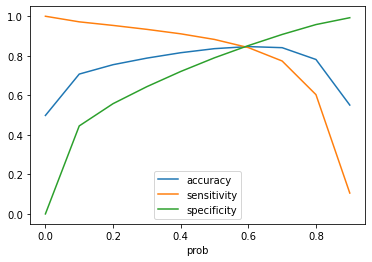

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, cut off is at 0.6, we are considering 0.4 as the optimum point to take it as a cutoff probability, we are concentrating to improve the sensitivity inorder to retain the customers and not compromising accuracy

In [113]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Probability.map( lambda x: 1 if x > 0.4 else 0)

y_test_pred_final.head()

y_test  Churn_Probability  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
21537       1           0.806587    1    1    1    1    1    1    1    1    1   
5610        0           0.006303    1    0    0    0    0    0    0    0    0   
98530       1           0.866509    1    1    1    1    1    1    1    1    1   
89069       1           0.830861    1    1    1    1    1    1    1    1    1   
30975       0           0.490578    1    1    1    1    1    0    0    0    0   

       0.9  final_predicted  
21537    0                1  
5610     0                0  
98530    0                1  
89069    0                1  
30975    0                1

In [114]:
y_pred_logm6 = y_test_pred_final['final_predicted']

In [115]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_true=y_test,y_pred=y_pred_logm6)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_true=y_test,y_pred=y_pred_logm6))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[13640  5291]
 [ 1670 17120]]
Accuracy:- 0.815460883857798
Sensitivity:- 0.9111229377328366
Specificity:- 0.7205113306217316


In [116]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.y_test, y_test_pred_final.Churn_Probability, 
                                         drop_intermediate = False )

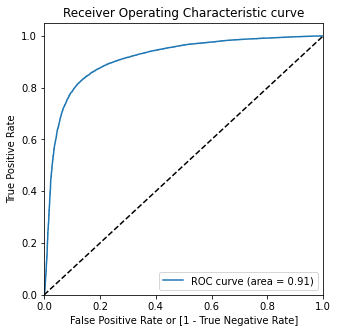

In [118]:
draw_roc(y_test_pred_final.y_test, y_test_pred_final.Churn_Probability)

###### ROC curve tells us how good the model is, it is True positive rate vs False Positive rate, we are able to achieve 91% 

In [119]:
p, r, thresholds = precision_recall_curve(y_test_pred_final.y_test, y_test_pred_final.Churn_Probability)

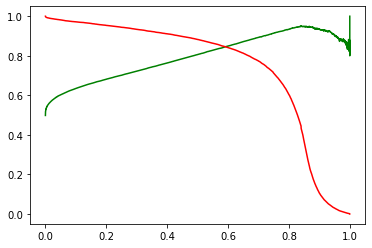

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###### It is desired that the algorithm should have both high precision, and high recall. However, often its a trade-off between the two. A good PR curve has greater AUC (area under curve). 

#### Step 5: Inference 

From building a logistic regression with RFE and VIF we were able to reduce the number of features from 123 to 26 and also 0.4 was set as the limit probability to seperate the churn and active customer.


### Step 6: Dimensionality Reduction
##### Build a logistic regression model with PCA

In [121]:
# Instantiate PCA
pca = PCA(random_state=42)

In [122]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [123]:
columns = list(X_train.columns)
pca_components_df = pd.DataFrame(pca.components_, columns=columns,index=columns)
pca_components_df

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
onnet_mou_6             0.100696     0.124050     0.124663  1.313154e-01   
onnet_mou_7             0.156100     0.171950     0.139356  1.101669e-01   
onnet_mou_8            -0.048194    -0.034310    -0.018713 -2.413417e-02   
offnet_mou_6           -0.057113    -0.055274    -0.051150 -1.933630e-02   
offnet_mou_7           -0.041105    -0.083680    -0.101171  1.229319e-01   
...                          ...          ...          ...           ...   
jul_vbc_3g             -0.000002    -0.000002    -0.000005 -2.658834e-06   
jun_vbc_3g             -0.000005    -0.000003    -0.000001 -4.123501e-06   
total_revenue          -0.000002    -0.000010    -0.000008 -8.002378e-07   
cust_profile_low        0.000002    -0.000004    -0.000002  1.292939e-06   
cust_profile_medium     0.000001     0.000004    -0.000001  3.666859e-08   

                     offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
onnet_mou_6          1.576820e-01  1.579649e-01   1.604388e-02   1.149199e-02   
onnet_mou_7          1.216886e-01  8.032879e-02   1.278592e-02   1.338751e-02   
onnet_mou_8         -6.266089e-03  1.233324e-02   3.774855e-02   4.529083e-02   
offnet_mou_6        -1.352055e-02 -1.208768e-02   4.102152e-02   4.025107e-02   
offnet_mou_7         8.937104e-02  4.960812e-02   9.776865e-02   1.111791e-01   
...                           ...           ...            ...            ...   
jul_vbc_3g          -9.604852e-07 -5.502105e-06  -4.012671e-08  -7.045143e-08   
jun_vbc_3g          -3.930597e-06 -2.288880e-06   5.809326e-08   4.467833e-08   
total_revenue       -9.887395e-06 -9.232067e-06  -1.112305e-07   1.144204e-07   
cust_profile_low    -3.024088e-06 -3.151074e-06   1.833061e-08  -3.045486e-08   
cust_profile_medium  4.601296e-06 -6.727398e-07  -6.346489e-08   2.765914e-08   

                     roam_ic_mou_8  roam_og_mou_6  ...  monthly_3g_8  \
onnet_mou_6           1.643332e-02   2.329001e-02  ...  4.715423e-02   
onnet_mou_7           2.006580e-02   3.954529e-02  ... -5.458660e-02   
onnet_mou_8           4.265959e-02   5.226949e-02  ...  2.129333e-01   
offnet_mou_6          3.610562e-02   2.510677e-02  ...  2.545089e-02   
offnet_mou_7          9.814712e-02   1.172922e-01  ... -5.476721e-02   
...                            ...            ...  ...           ...   
jul_vbc_3g            8.008988e-08   4.386279e-07  ...  1.396159e-07   
jun_vbc_3g            1.071799e-08   1.186305e-06  ... -9.317212e-08   
total_revenue        -1.152126e-07   1.716192e-07  ...  1.487514e-08   
cust_profile_low      4.303896e-08  -4.469291e-07  ... -4.077639e-09   
cust_profile_medium  -4.697568e-08  -6.627129e-08  ...  7.760539e-09   

                      sachet_3g_6   sachet_3g_7   sachet_3g_8    aug_vbc_3g  \
onnet_mou_6          1.308087e-02  1.781807e-02  1.800205e-02  5.272191e-02   
onnet_mou_7         -1.000754e-02 -7.214357e-03 -8.743718e-03 -6.647746e-02   
onnet_mou_8          7.980074e-02  8.954303e-02  8.285029e-02  2.207011e-01   
offnet_mou_6         1.019226e-02  1.206962e-02  1.159459e-02  3.236020e-02   
offnet_mou_7        -1.423530e-01 -1.634787e-01 -1.568030e-01 -1.040793e-01   
...                           ...           ...           ...           ...   
jul_vbc_3g          -4.714804e-08 -1.482295e-07  3.262410e-07  8.810198e-08   
jun_vbc_3g           4.364710e-08  7.580345e-08 -8.306301e-08  6.786042e-08   
total_revenue       -1.306521e-08 -6.091003e-08  8.334476e-08  9.441351e-08   
cust_profile_low    -2.497055e-08  6.162977e-08 -7.730555e-09 -7.196391e-08   
cust_profile_medium -5.361594e-08  2.661106e-08  1.483928e-08  4.655751e-09   

                       jul_vbc_3g    jun_vbc_3g  total_revenue  \
onnet_mou_6          5.184165e-02  4.332576e-02   1.595888e-01   
onnet_mou_7         -6.713154e-02 -6.390782e-02  -1.487895e-02   
onnet_mou_8          2.339572e-01  2.188750e-01   9.638608e-02   
offnet_mou_6         3.701970e-02  3.290048e-02  -2.36654

In [124]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.12851248 0.20070336 0.24907401 0.29077159 0.32564153 0.35607062
 0.38610066 0.41269745 0.43789433 0.46264519 0.48637264 0.5085147
 0.52969907 0.54994296 0.56953057 0.58595965 0.60169096 0.61578057
 0.62973485 0.64346766 0.65666076 0.66940912 0.68196702 0.69415804
 0.70582704 0.71728574 0.72811365 0.73824563 0.74743021 0.75650299
 0.76514342 0.77368426 0.78187496 0.78970666 0.7972871  0.80471848
 0.81191776 0.81896792 0.82589909 0.83228612 0.83853964 0.84469796
 0.8507366  0.85632629 0.86140506 0.86635003 0.87120738 0.87598607
 0.88059267 0.88516054 0.88969677 0.89416007 0.89842134 0.90256593
 0.90658437 0.91057104 0.91445304 0.91828127 0.92183346 0.92534501
 0.92862903 0.93174464 0.93479994 0.9377006  0.94051143 0.94330021
 0.94603978 0.94869644 0.95129934 0.95384794 0.95638211 0.95888251
 0.96129206 0.96363174 0.96591514 0.96810425 0.9702306  0.97227404
 0.97430742 0.97621177 0.97807664 0.97991944 0.98168456 0.98342494
 0.98508847 0.98672188 0.98824489 0.98968436 0.99102743 0.99227

Text(0, 0.5, 'Cumulative Variance')

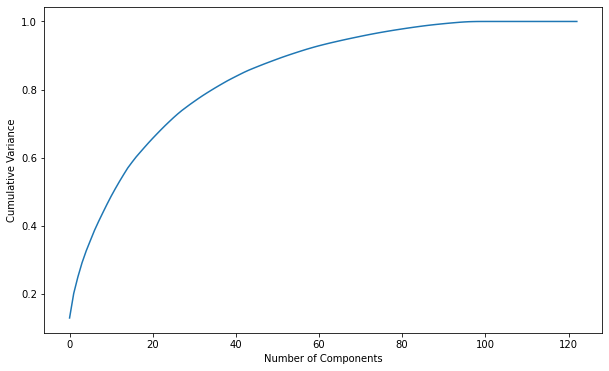

In [125]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

##### We can see that 70 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [126]:
count = 0
for i in variance_cumu:
    if i >= 0.9:
        count = count + 1
print(count)

70


In [127]:
# Instantiate PCA with 70 components
pca_final = IncrementalPCA(n_components=70)

In [128]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [129]:
X_test_pca = pca_final.transform(X_test)

In [130]:
# Creating KFold object with 5 splits

folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [131]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)

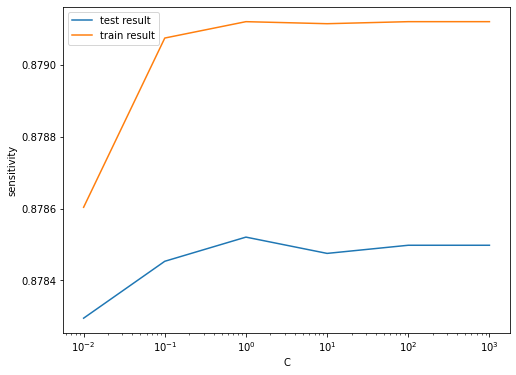

In [132]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [133]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8785205288054895 at C = 1


In [134]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [135]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [136]:
# Predictions on the test set
y_pred_pca = log_pca_model.predict(X_test_pca)

In [137]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_true=y_test,y_pred=y_pred_pca)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_true=y_test,y_pred=y_pred_pca))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[15010  3921]
 [ 2252 16538]]
Accuracy:- 0.8363511041594868
Sensitivity:- 0.8801490154337414
Specificity:- 0.7928794041519202


#### Step 6: Inference 

Sensitivity has dropped by 3% when we tried with LR-PCA, so we are using the LR-RFE method to generate data it gave us better accuracy and Sensitivity, and we have used the output of RFE method to upload in Kaggle.

### Step 7: Kaggle prediction
##### Predictions on unseen test data (kaggle - test.csv)

In [138]:
test_df = pd.read_csv("test.csv")

##### Performaing all steps data cleaning, column removal, dummies creation, scaling on test.csv 

In [139]:
test_df.drop(columns=column_to_remove,axis=1,inplace=True)

In [140]:
test_df['aon_in_months'] = test_df['aon'].apply(lambda x: round((x/365)*12,2))
test_df['arpu'] = round((test_df['arpu_6']+test_df['arpu_7']+test_df['arpu_8'])/3,2)
test_df['total_revenue'] = test_df['aon_in_months']*test_df['arpu']
test_df.drop(columns = ['aon','aon_in_months','arpu','arpu_6','arpu_7','arpu_8'],axis=1,inplace=True)
test_df.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        31.78        20.23        23.11         60.16         32.16   
1        75.51        41.21        19.84        474.34        621.84   
2         7.54         7.86         8.40         16.98         45.81   
3         5.31         2.16         0.00         40.04        205.01   
4       450.93       609.03       700.68         60.94         23.84   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         34.83           0.00           0.00           0.00           0.00   
1        394.94           0.00           0.00           0.00           0.00   
2         45.04          22.81         103.38          26.08          24.53   
3         24.01           0.00           0.00           0.00           0.00   
4         74.16           0.00           0.00           0.00           0.00   

   ...  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
0  ...             0             0             0            0            0   
1  ...             0             0             0            0            0   
2  ...             0             0             0            0            0   
3  ...             0             0             0            0            0   
4  ...             0             0             0            0            0   

   sachet_3g_8  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_revenue  
0            0        0.00        0.00        0.00      4110.5007  
1            0        0.00        0.00        0.00     35827.0560  
2            0      525.61      758.41      241.84      4588.3426  
3            0        0.00        0.00        0.00      3263.0020  
4            0        0.00        0.00        0.00      5703.6931  

[5 rows x 121 columns]

In [141]:
test_df['cust_profile'] = test_df['total_revenue'].apply(lambda x: 'high' if x >= high_limit 
 
                                                           else ('low' if x <= low_limit else 'medium'))
test_df['cust_profile'].value_counts()

medium    11873
low        9125
high       9002
Name: cust_profile, dtype: int64

In [142]:
missing_data_test = pd.DataFrame(round(100*(test_df.isnull().sum()/test_df.shape[0]), 2)).reset_index()
missing_data_test

index     0
0      onnet_mou_6  3.90
1      onnet_mou_7  3.91
2      onnet_mou_8  5.58
3     offnet_mou_6  3.90
4     offnet_mou_7  3.91
..             ...   ...
117     aug_vbc_3g  0.00
118     jul_vbc_3g  0.00
119     jun_vbc_3g  0.00
120  total_revenue  0.00
121   cust_profile  0.00

[122 rows x 2 columns]

In [143]:
for i in list(missing_data_test[missing_data_test[0]>0]['index']):
    test_df[i] = test_df[i].fillna(0)

In [144]:
profile = pd.get_dummies(test_df['cust_profile'], drop_first=True, prefix='cust_profile')
test_df.drop(columns=['cust_profile'],axis=1,inplace=True)
test_df = pd.concat([test_df,profile],axis=1)

In [145]:
X_test = test_df
print(test_df.shape, X_test.shape)

(30000, 123) (30000, 123)


In [146]:
X_test[columns] = scaler.transform(X_test[columns])

In [147]:
sample_data = pd.read_csv('test.csv')
sample_data = sample_data[['id']]

#### predicting on unseen data test set using Logistic Regression RFE model 

In [148]:
X_test = X_test[col]
X_test = sts.add_constant(X_test)
sample_data['churn'] = logm6.predict(X_test)

In [149]:
sample_data['churn_probability'] = sample_data.churn.map( lambda x: 1 if x > 0.4 else 0)

In [150]:
sample_data.drop(["churn"], inplace=True, axis=1)

In [151]:
#Saving the predictions of LR-RFE on unseen data set and tested in Kaggle
sample_data.to_csv("churn_test_pred_LR_RFE.csv",index=False)

#### predicting on unseen data test set using Logistic Regression PCA model

In [152]:
X_test = test_df

In [153]:
X_test_pca = pca_final.transform(X_test)

In [154]:
X_test_pred = log_pca_model.predict(X_test_pca)

In [155]:
sample_data['churn_probability'] = X_test_pred

In [156]:
#Saving the predictions of LR-PCA on unseen data set and tested in Kaggle
sample_data.to_csv("churn_test_pred_LR_PCA.csv",index=False)

#### predicting on unseen data test set using Decision Tree model

In [157]:
X_test = test_df

In [158]:
sample_data['churn_probability'] = dt_tuned.predict(X_test)

In [159]:
#Saving the predictions of Decision Tree on unseen data set and tested in Kaggle
sample_data.to_csv("churn_test_pred_DT.csv",index=False)

#### predicting on unseen data test set using Random Forest model, which gave us best results so far

In [160]:
X_test = test_df

In [161]:
sample_data['churn_probability'] = classifier_rf.predict(X_test)

In [162]:
#Saving the predictions of Random Forest best model on unseen data set and tested in Kaggle
sample_data.to_csv("churn_test_pred_RF.csv",index=False)

#### Step 7: Inference 

This Random Forest model gave us accuracy of 0.94 in Kaggle submission, hence we consider this as our best model in prediction

### Conclusion:

- While applying PCA on Logistic Regression, Sensitivity has dropped by 3% when we tried with LR-PCA, so we are using the LR-RFE method to generate data it gave us better accuracy and Sensitivity(Accuracy:- 0.815460883857798, Sensitivity:- 0.9111229377328366) 
-  After all the model building and several submissions made in kaggle we have concluded that Random Forest classifier has given best results (Accuracy:- 0.9335383473396781, Sensitivity:- 0.9269824374667376, Specificity:- 0.9400454281337489) on test data. On unknown data , it has given 94% in kaggle.
- We are considering that these variables are of high importance for telecom company to consider inorder to decrease the churn of customers:
 - roam_ic_mou
 - roam_og_mou
 - loc_og_mou
 - total_og_mou
 - loc_ic_t2t_mou
 - loc_ic_t2m_mou
 - loc_ic_mou
 - total_ic_mou
 - total_rech_amt
 - max_rech_amt